# Fik-6 let 19. 12. 2020 

## Import data

In [59]:
from fik3 import *

cf_nav, cf_candy = \
    read_airdos_cf_log("/storage/experiments/2020/12_fik6/let/CF/DATALOG.TXT", mergeruns=True)
ff_candy, = \
    read_airdos_ff_log("/storage/experiments/2020/12_fik6/let/FF/DATALOG_corr.TXT", mergeruns=True)
gm_nav, gm = \
    read_airdos_gm_log("/storage/experiments/2020/12_fik6/let/GM/DATALOG.TXT", mergeruns=True)

cf_nav_ = cf_nav.dropna()
ff_candy.index = cf_nav_.index[0] - pd.to_timedelta(cf_nav_.iloc[0]['Time'], unit='sec') \
                 + pd.to_timedelta(ff_candy['Time'], unit='sec')

import aerocalc.std_atm
press2alt = \
    lambda press: aerocalc.std_atm.press2alt(press, press_units='pa',
                                             alt_units='m')
None

In [60]:
# Run this only ones !!!!
df = pd.read_csv("/storage/experiments/2020/12_fik6/let/FF/DATALOG.TXT", header=None, engine='python')
df.loc[df[0]=='$TIME']
dfo = df.loc[((df[0]=='$TIME') & (df[1]=='2701'))| (df[0]=='$AIRDOS') | (df[0]=='$CANDY') | ((df[0]=='$GPRMC')&(df[1]=='083831.00'))]
dfo.to_csv("/storage/experiments/2020/12_fik6/let/FF/DATALOG_corr.TXT", header=None, index=False)

In [21]:
df.loc[df[1]=='083831.00']

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
21,$GPRMC,083831.00,A,4942.92277,N,01405.59866,E,2.386,NaN,191220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Display raw data
- __CF__ - AIRDOS C with CRY-19 scintillator and SiPM
- __FF__ - SPACEDOS02A 
- __SPACEDOS__ - SPACEDOS01A from Socrat
- __GM__ - G-M Counter with AIRDOS logger
- __GM-BE__ - Another G-M Counter from Belgian's experiment
- Environment sensors:
    * __Temperature__ at the bottom (AIRDOS GM)
    * __Humidity__ at the bottom (AIRDOS GM)
    * __Atmospheric Pressure__ in CANDY box (AIRDOS CF)
    * __Temperature__ in CANDY box (AIRDOS CF)

No handles with labels found to put in legend.


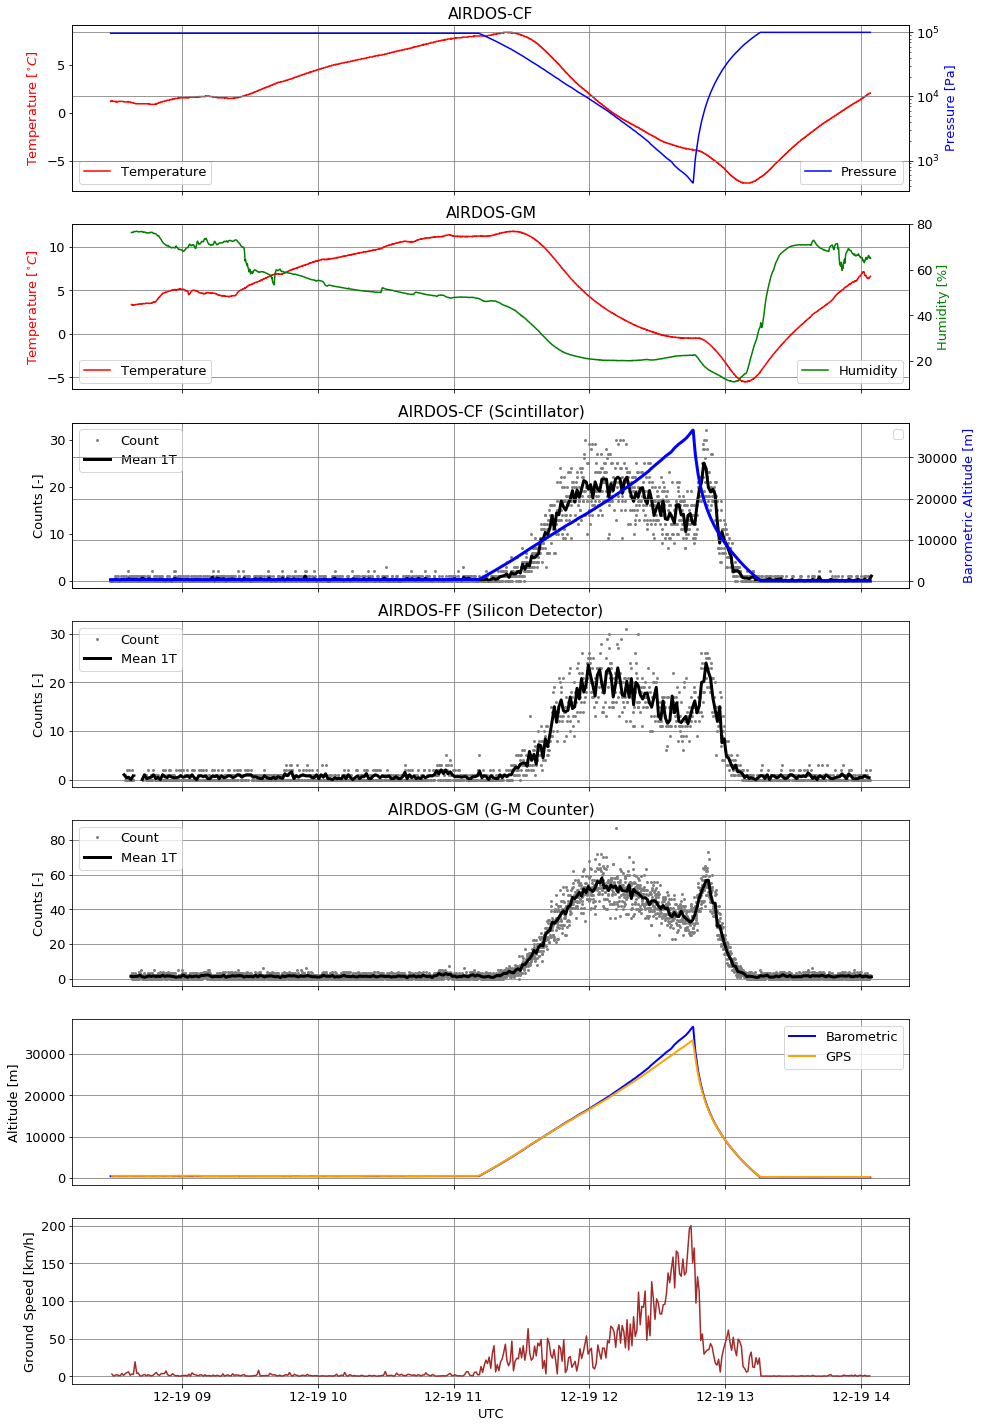

In [16]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, (ax3, ax1, ax4, ax5, ax2, ax8, ax9) \
    = plt.subplots(figsize=(15, 25), nrows=7, sharex=True)
ax1_twin = ax1.twinx()
#ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax4_twin = ax4.twinx()
#ax10_twin = ax10.twinx()

MINUTES = 1
WINDOW = str(MINUTES) + 'T'
OFFSET = str(MINUTES/2) + 'T'

# GM
ax2.set_title("AIRDOS-GM (G-M Counter)")
ax2.set_ylabel('Counts [-]')
ax2.plot(gm.index, gm['GMCount'], linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax2.plot(gm['GMCount'].resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
ax2.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax2.legend(loc=2)

ax1.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax1.set_title("AIRDOS-GM")
ax1.plot(gm.index, gm['Temp'], color='red', label='Temperature')
ax1.grid(b=True, which='major', color='grey', linestyle='-')
ax1.legend(loc=3)
ax1_twin.set_ylabel('Humidity [%]', color='green')
ax1_twin.plot(gm.index, gm['Humid'], label='Humidity', color='green')
ax1_twin.legend(loc=4)

#ax2_twin.set_ylabel('Barometric Altitude [$m$]', color='blue')
#ax2_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
#              color='blue', lw=3)
ax2.grid(b=True, which='major', color='grey', linestyle='-', axis='y')
#ax2_twin.legend(loc=1)

# CF
spec = np.array(list(map(list, cf_candy['Bins'])))
flux_series = pd.Series(np.sum(spec[:,50:200], axis=1), index=cf_candy.index)

ax4.set_title("AIRDOS-CF (Scintillator)")
ax4.set_ylabel('Counts [-]')
ax4.plot(flux_series.index, flux_series.values, linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax4.plot(flux_series.resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
ax4.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax4.legend(loc=2)
ax3.set_title("AIRDOS-CF")
ax3.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax3.plot(cf_candy.index, cf_candy['Temp'], label='Temperature', color='red')
ax3.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax3.legend(loc=3)
#ax3_twin.set_ylim(0,2000)
ax3_twin.set_yscale('log')
ax3_twin.set_ylabel('Pressure [Pa]', color='blue')
ax3_twin.plot(cf_candy.index, cf_candy['Pressure'], label='Pressure', color='blue')
ax3_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax3_twin.legend(loc=4)

ax4_twin.set_ylabel('Barometric Altitude [m]', color='blue')
ax4_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
              color='blue', lw=3)
ax4_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax4_twin.legend(loc=1)

# FF
#ax5.set_ylim(0, 60)
ax5.set_title('AIRDOS-FF (Silicon Detector)')
ax5.set_ylabel('Counts [-]')
ax5.plot(ff_candy['Flux'], linestyle='', marker='.', label='Count', markeredgewidth=0, color='gray')
ax5.plot(ff_candy['Flux'].resample(WINDOW, loffset=OFFSET).mean(), lw=3, label='Mean '+WINDOW, color='black')
ax5.grid(b=True, which='major', color='grey', linestyle='-')
ax5.legend(loc=2)

ax8.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
         color='blue', lw=2, label='Barometric')
ax8.plot(cf_nav.index, cf_nav['Alt'],
         color='orange', lw=2, label='GPS')
ax8.legend(loc=1)
ax8.set_ylabel('Altitude [m]')
ax8.grid(b=True, which='major', color='grey', linestyle='-')

ax9.plot(cf_nav.index, cf_nav['Speed'], color='brown')
ax9.set_ylabel('Ground Speed [km/h]')
ax9.grid(b=True, which='major', color='grey', linestyle='-')
#ax9.set_ylim(0,150)
ax9.set_xlabel('UTC')

None

## Plot Map

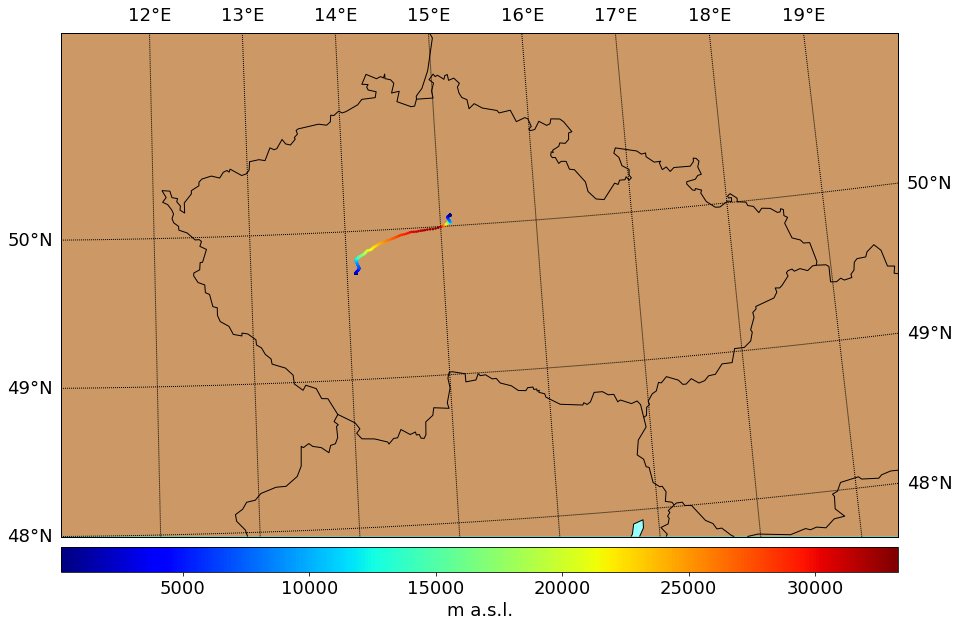

In [8]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
import numpy as np

matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,15))
m = Basemap(llcrnrlon=11.0, llcrnrlat=48.0, urcrnrlon=20.0,
            urcrnrlat=51.0, epsg = 31284,resolution='i',projection='merc')

x, y = m(list(cf_nav["Lon"].array),list(cf_nav["Lat"].array))
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
#m.shadedrelief(scale=1)
m.drawcountries(linewidth=1)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(48.,51.,),labels=[1,1,0,0])
m.drawmeridians(np.arange(11.,20.,),labels=[0,0,1,0])

im1 = m.scatter(x,y,c=list(cf_nav["Alt"]), s=7, marker='o',
                linewidth=0, cmap='jet', zorder=99)
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('m a.s.l.')
plt.show()

## Plot Spectra

/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


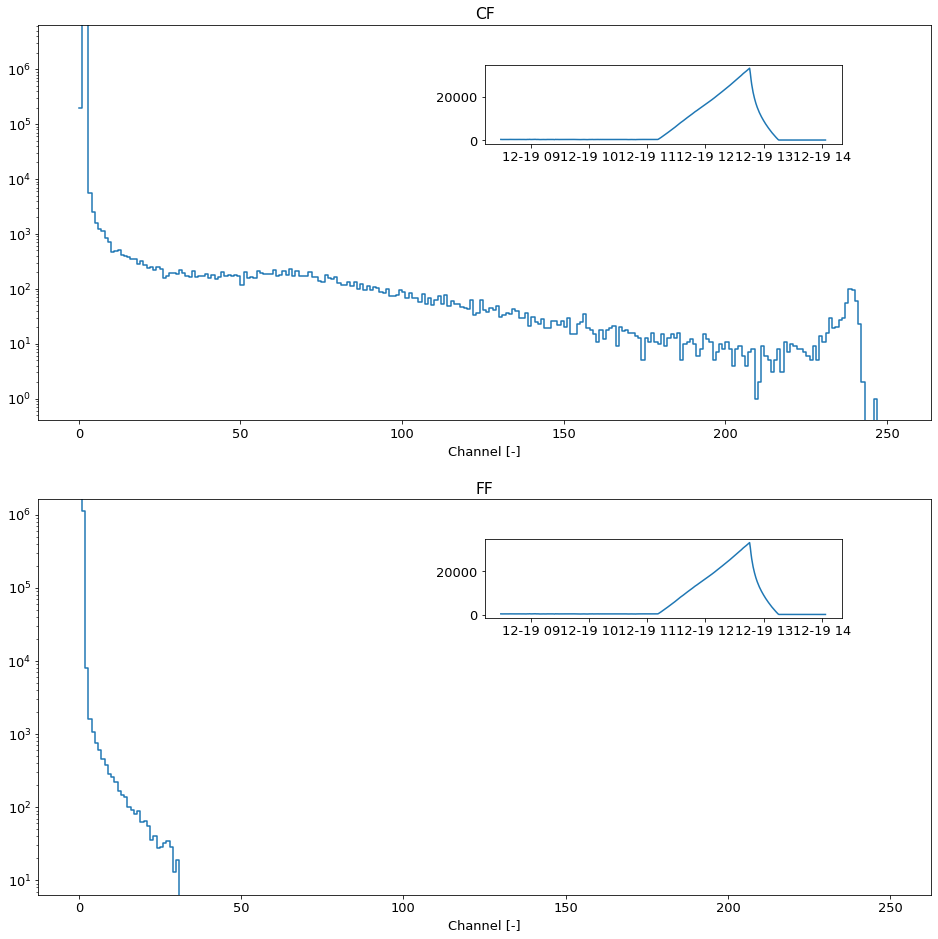

In [166]:
def spectrum_inbetween(tfrom, tto, detectors=None, figsize=None):
    if isinstance(tto, pd.Timedelta):
        tto = tfrom + tto
    
    fig, axes = plt.subplots(
        figsize=(16, 16) if (figsize is None) else figsize,
        nrows=2
    )
    
    for ax in axes.flat:
        n = cf_nav[np.logical_and(
            cf_nav.index > tfrom,
            cf_nav.index < tto
        )]
        ax.inset_axes([0.5, 0.7, 0.4, 0.2]).plot(n.index, n['Alt'])
    
    for candy, axes, title in \
            zip([cf_candy, ff_candy], axes, ["CF", "FF"]):
        c = candy[np.logical_and(
            candy.index > tfrom,
            candy.index < tto
        )]
        spec = np.array(list(map(list, c['Bins'])))
        axes.set_title(title)
        axes.set_yscale('log')
        axes.plot(np.sum(spec, axis=0), drawstyle='steps-post')
        axes.set_ylim(0, np.max(spec)*100)
        axes.set_xlabel('Channel [-]')

spectrum_inbetween(cf_candy.index[0], cf_candy.index[-1])

## Plot CF spectra in time

/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_ins

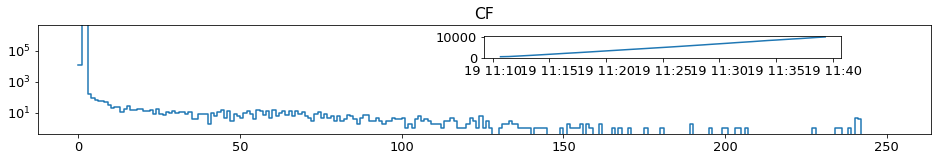

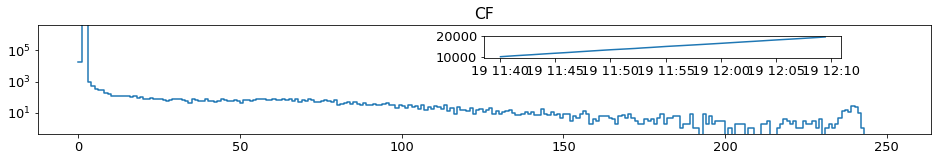

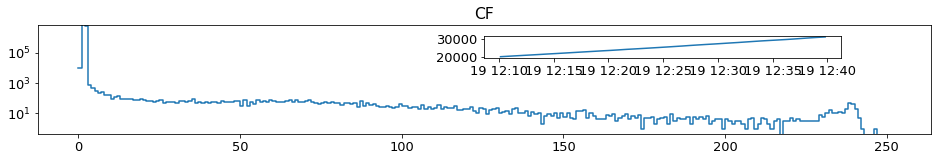

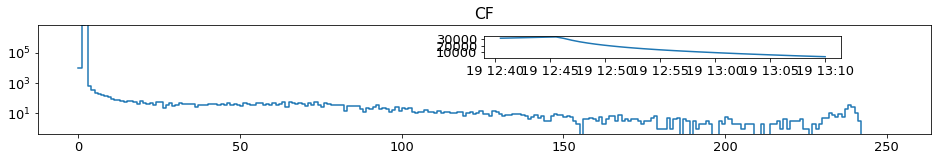

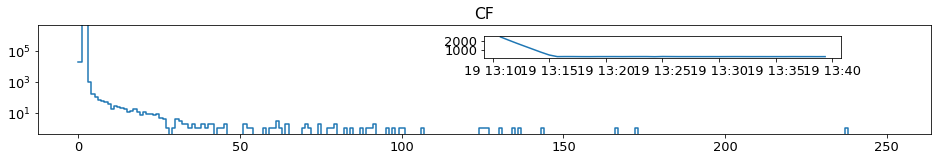

In [169]:
def cf_spectrum_inbetween(tfrom, tto, detectors=None, figsize=None):
    if isinstance(tto, pd.Timedelta):
        tto = tfrom + tto
    
    fig, axes = plt.subplots(
        figsize=(16, 2) if (figsize is None) else figsize,
        nrows=1
    )
    n = cf_nav[tfrom:tto]
    axes.inset_axes([0.5, 0.7, 0.4, 0.2]).plot(n.index, n['Alt'])
    c = cf_candy[tfrom:tto]
    spec = np.array(list(map(list, c['Bins'])))
    axes.set_title("CF")
    axes.set_yscale('log')
    axes.plot(np.sum(spec, axis=0), drawstyle='steps-post')
    axes.set_ylim(0, np.max(spec)*100)

N = 5
s = pd.Timestamp(year=2020, month=12, day=19, hour=11, minute=10, tz='UTC')
e = pd.Timestamp(year=2020, month=12, day=19, hour=13, minute=40, tz='UTC')

delta = e - s
m = delta/N
for i in range(N):
    cf_spectrum_inbetween(s+m*i, s+m*(i+1))

# Vertical Profiles

In [89]:
import aerocalc
press2alt = \
    lambda press: aerocalc.std_atm.press2alt(press, press_units='pa',
                                             alt_units='m')

MINUTES = 5
WINDOW = str(MINUTES) + 'T'
OFFSET = str(MINUTES/2) + 'T'

def pressure_for(m):
    alt = cf_candy['Pressure']
    return alt.reindex(alt.index.union(m.index)).interpolate(method='index', limit=5).reindex(m.index)

def vertical_profile(tfrom, tto, separate=False, axes=None):
    host = None
    if axes is None and not separate:
        fig = plt.figure(figsize=(10, 10))
        host = fig.add_subplot(111)
        par1 = host.twiny()
        par2 = host.twiny()
        #par3 = host.twiny()
        #axes = [host, par1, par2, par3]
        axes = [host, par1, par2]
    
    cf_spec = np.array(list(map(list, cf_candy['Bins'])))
    # Calculate flux from flat region
    cf_flux = pd.Series(np.sum(cf_spec[:,50:200], axis=1),
                        index=cf_candy.index)
    flux_series = [
        cf_flux,
        ff_candy['Flux'],
        gm['GMCount'],
    ]
    
    lns = []
    for flux, ax, label, col in zip(flux_series,
                               axes,
                               ["AIRDOS-CF", "AIRDOS-FF", "AIRDOS-GM"],
                               [plt.cm.viridis(0), plt.cm.viridis(0.5),
                                plt.cm.viridis(.9), plt.cm.viridis(.25)]):
        resample = flux[tfrom:tto].resample(WINDOW, loffset=OFFSET)
        mean = resample.mean()
        
        if separate and axes is None:
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111)
            ax.set_title(label)

        ax.set_ylabel("Altitude [m]")
        ax.set_xlabel("Flux / Counts [-]", color=col)
        r = ax.errorbar(mean, pressure_for(mean).apply(press2alt), label=label,
                        xerr=resample.sem()*2, fmt='o', color=col)
        lns.append(r)

    if host is not None:
        par2.spines['top'].set_position(('outward', 60))
        par3.spines['top'].set_position(('outward', 120))
    if not separate:
        axes[0].legend(handles=lns, loc='upper left')

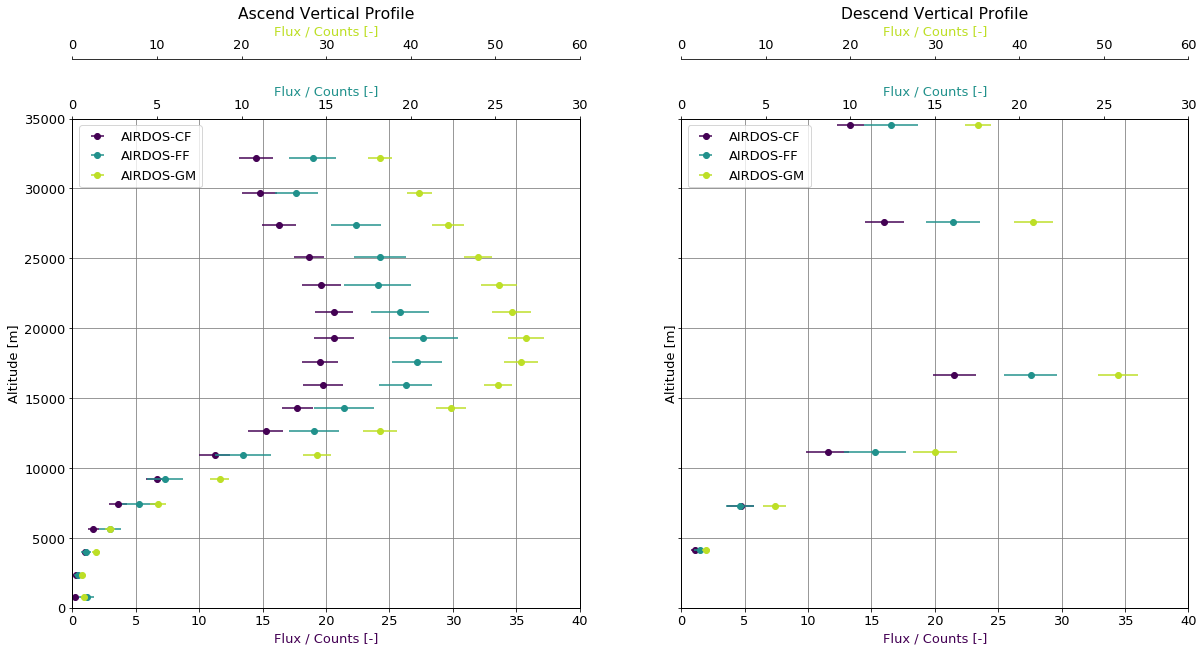

In [90]:
CF_XLIM = (0, 40)
FF_XLIM = (0, 30)
GM_XLIM = (0, 60)
#SD_XLIM = (0, 14)

ALT_YLIM = (0, 35000)

fig, (host1, host2) = plt.subplots(figsize=(20, 9), ncols=2, sharey=True)

par11 = host1.twiny()
par12 = host1.twiny()
#par13 = host1.twiny()
par12.spines['top'].set_position(('outward', 60))
#par13.spines['top'].set_position(('outward', 120))
host1.set_xlim(*CF_XLIM)
par11.set_xlim(*FF_XLIM)
par12.set_xlim(*GM_XLIM)
#par13.set_xlim(*SD_XLIM)
host1.set_ylim(*ALT_YLIM)

par21 = host2.twiny()
par22 = host2.twiny()
#par23 = host2.twiny()
par22.spines['top'].set_position(('outward', 60))
#par23.spines['top'].set_position(('outward', 120))
host2.set_xlim(*CF_XLIM)
par21.set_xlim(*FF_XLIM)
par22.set_xlim(*GM_XLIM)
#par23.set_xlim(*SD_XLIM)
host2.set_ylim(*ALT_YLIM)

# Ascend
s = pd.Timestamp(year=2020, month=12, day=19, hour=11, minute=10, tz='UTC')
e = pd.Timestamp(year=2020, month=12, day=19, hour=12, minute=40, tz='UTC')
vertical_profile(s, e, axes=[host1, par11, par12])
host1.set_title("Ascend Vertical Profile")
host1.grid(b=True, which='major', color='grey', linestyle='-')

# Descend
s = pd.Timestamp(year=2020, month=12, day=19, hour=12, minute=40, tz='UTC')
e = pd.Timestamp(year=2020, month=12, day=19, hour=13, minute=10, tz='UTC')
vertical_profile(s, e, axes=[host2, par21, par22])
host2.set_title("Descend Vertical Profile")
host2.grid(b=True, which='major', color='grey', linestyle='-')

None

In [79]:
import aerocalc
press2alt = \
    lambda press: aerocalc.std_atm.press2alt(press, press_units='pa',
                                             alt_units='m')

MINUTES = 1
WINDOW = str(MINUTES) + 'T'
OFFSET = str(MINUTES/2) + 'T'

def pressure_for(m):
    alt = cf_candy['Pressure']
    return alt.reindex(alt.index.union(m.index)).interpolate(method='index', limit=5).reindex(m.index)

def vertical_profile(tfrom, tto, separate=False, axes=None):
    host = None
    if axes is None and not separate:
        fig = plt.figure(figsize=(10, 10))
        host = fig.add_subplot(111)
        par1 = host.twiny()
        par2 = host.twiny()
        #par3 = host.twiny()
        #axes = [host, par1, par2, par3]
        axes = [host, par1, par2]
    
    cf_spec = np.array(list(map(list, cf_candy['Bins'])))
    # Calculate flux from flat region
    cf_flux = pd.Series(np.sum(cf_spec[:,50:200], axis=1),
                        index=cf_candy.index)
    flux_series = [
        cf_flux,
        ff_candy['Flux'],
        gm['GMCount'],
    ]
    
    lns = []
    for flux, ax, label, col in zip(flux_series,
                               axes,
                               ["AIRDOS-CF", "AIRDOS-FF", "AIRDOS-GM"],
                               [plt.cm.viridis(0), plt.cm.viridis(0.5),
                                plt.cm.viridis(.9), plt.cm.viridis(.25)]):
        resample = flux[tfrom:tto].resample(WINDOW, loffset=OFFSET)
        mean = resample.mean()
        
        if separate and axes is None:
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111)
            ax.set_title(label)

        ax.set_ylabel("Altitude [m]")
        ax.set_xlabel("Flux / Counts [-]", color=col)
        r = ax.errorbar(mean, pressure_for(mean).apply(press2alt), label=label,
                        xerr=resample.sem()*2, fmt='o', color=col)
        lns.append(r)

    if host is not None:
        par2.spines['top'].set_position(('outward', 60))
        par3.spines['top'].set_position(('outward', 120))
    if not separate:
        axes[0].legend(handles=lns, loc='upper left')

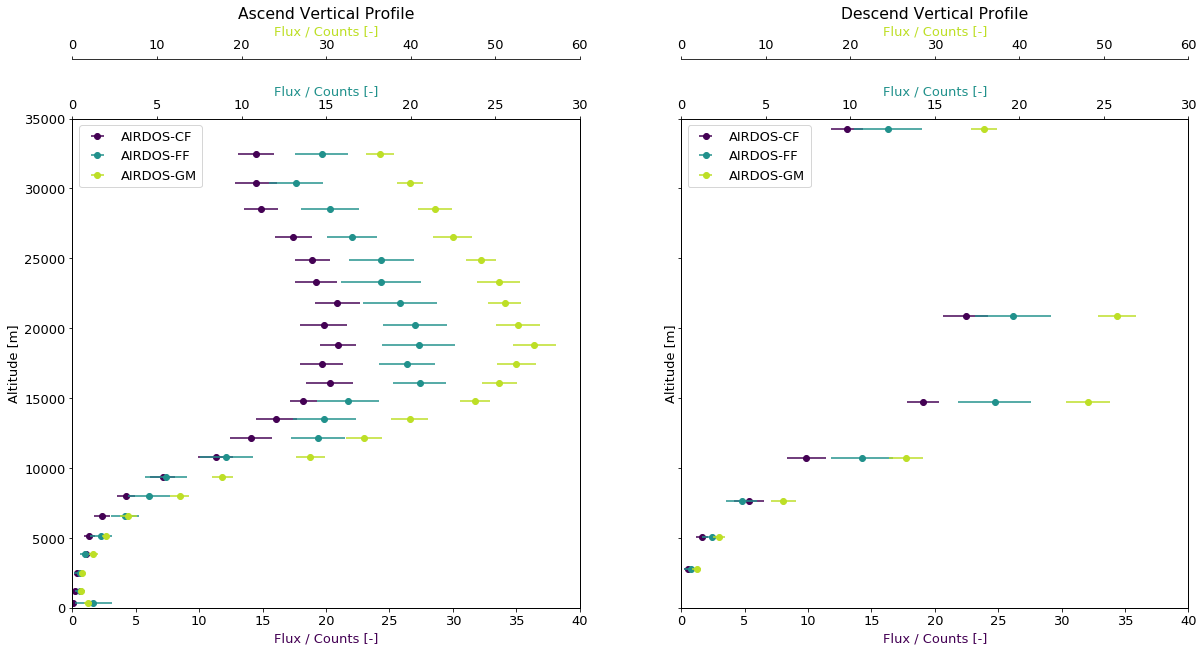

In [78]:
CF_XLIM = (0, 40)
FF_XLIM = (0, 30)
GM_XLIM = (0, 60)
#SD_XLIM = (0, 14)

ALT_YLIM = (0, 35000)

fig, (host1, host2) = plt.subplots(figsize=(20, 9), ncols=2, sharey=True)

par11 = host1.twiny()
par12 = host1.twiny()
#par13 = host1.twiny()
par12.spines['top'].set_position(('outward', 60))
#par13.spines['top'].set_position(('outward', 120))
host1.set_xlim(*CF_XLIM)
par11.set_xlim(*FF_XLIM)
par12.set_xlim(*GM_XLIM)
#par13.set_xlim(*SD_XLIM)
host1.set_ylim(*ALT_YLIM)

par21 = host2.twiny()
par22 = host2.twiny()
#par23 = host2.twiny()
par22.spines['top'].set_position(('outward', 60))
#par23.spines['top'].set_position(('outward', 120))
host2.set_xlim(*CF_XLIM)
par21.set_xlim(*FF_XLIM)
par22.set_xlim(*GM_XLIM)
#par23.set_xlim(*SD_XLIM)
host2.set_ylim(*ALT_YLIM)

# Ascend
s = pd.Timestamp(year=2020, month=12, day=19, hour=11, minute=10, tz='UTC')
e = pd.Timestamp(year=2020, month=12, day=19, hour=12, minute=40, tz='UTC')
vertical_profile(s, e, axes=[host1, par11, par12])
host1.set_title("Ascend Vertical Profile")


# Descend
s = pd.Timestamp(year=2020, month=12, day=19, hour=12, minute=40, tz='UTC')
e = pd.Timestamp(year=2020, month=12, day=19, hour=13, minute=10, tz='UTC')
vertical_profile(s, e, axes=[host2, par21, par22])
host2.set_title("Descend Vertical Profile")
None

Text(0, 0.5, 'Altitude [m]')

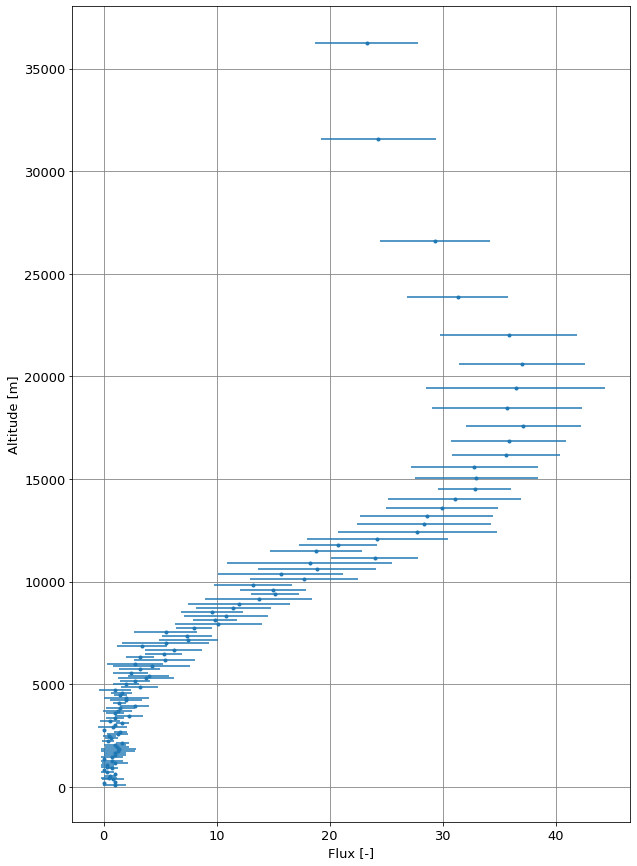

In [164]:
#ff_candy
cf = cf_candy.copy()
cf.reset_index(drop=True,inplace=True)
cf.set_index('Pressure', inplace=True)
cf.sort_index(inplace=True)
cf['tlak'] = cf.index
#xf = cf
xf = cf.groupby(round(cf.tlak,-3)).mean()
zf = cf.groupby(round(cf.tlak,-3)).std()

plt.figure(figsize=(10,15))
#plt.plot(xf.Flux,xf.tlak.apply(press2alt), marker='.', linestyle='')
plt.errorbar(xf.Flux,xf.tlak.apply(press2alt), xerr=zf.Flux, marker='.', linestyle='')
#plt.yscale('log')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.xlabel('Flux [-]')
plt.ylabel('Altitude [m]')
#xf

## Plot Spectra in Time as Waterfall

In [10]:
from fik import *
from os import path
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.colors import LogNorm


In [11]:
logs_dir = "/storage/experiments/2020/12_fik6/let/"

#logs_dir = '/storage/experiments/2020/1204_ABSJets/balon'

gm_logs, cf_logs = [
    DATALOG.split_runs(path.join(logs_dir, devid, 'DATALOG.TXT'))
    for devid in ['GM', 'CF']
]


In [12]:
#ff_logs = DATALOG.split_runs("/storage/experiments/2020/12_fik6/let/FF/DATALOG_corr.TXT")
ff_logs = ff_candy

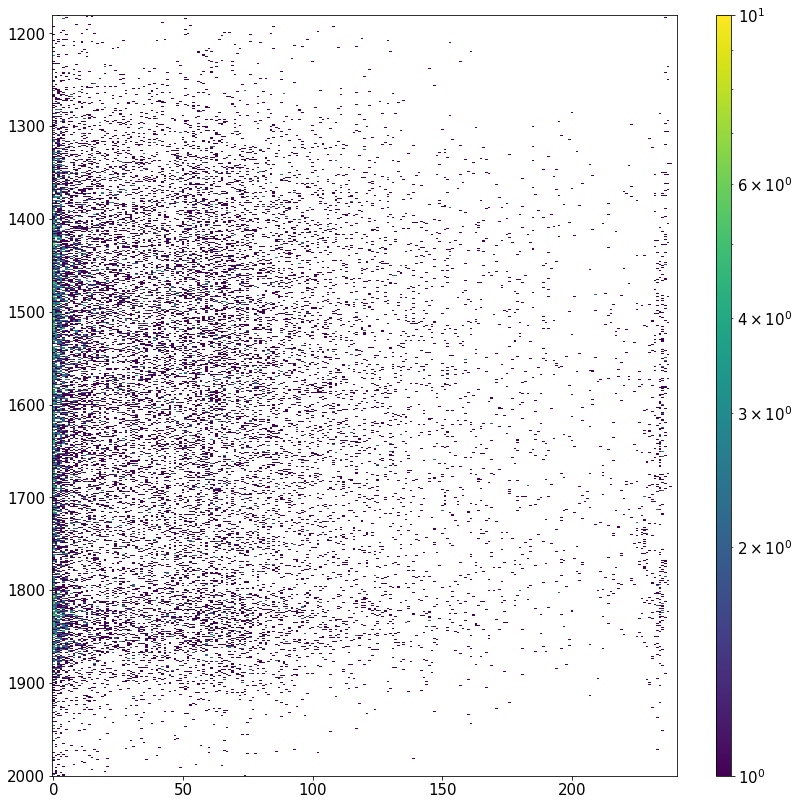

In [13]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
c_all = cf_logs[0].candy

# select time range of interest
ta = pd.Timestamp('2019-11-29T11:00', tz='UTC')
tb = pd.Timestamp('2019-11-29T13:00', tz='UTC')
c = c_all
#c = c_all[(c_all.index > ta) & (c_all.index < tb)]

# export spectra into a numpy array
spectra = np.array(list(c['Bins']))

plt.figure(figsize=(14, 14))
#plt.imshow(np.log(spectra), aspect='auto')
plt.imshow((spectra[:,4:245]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
plt.ylim(2000, 1180)
None

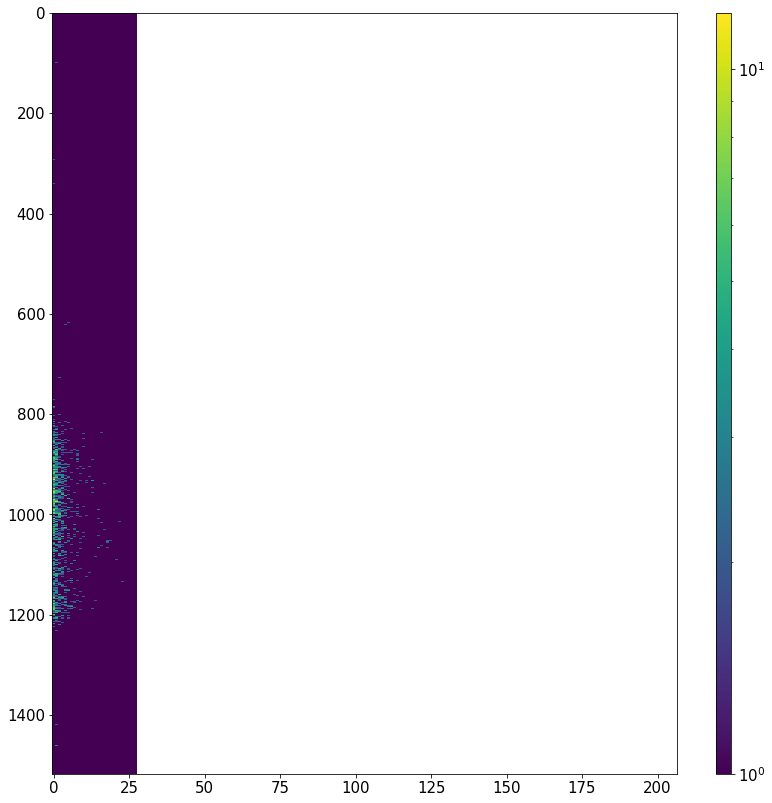

In [15]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
#c_all = ff_logs[1].candy
c_all = ff_logs

# select time range of interest
ta = pd.Timestamp('2019-11-29T11:00', tz='UTC')
tb = pd.Timestamp('2019-11-29T13:00', tz='UTC')
c = c_all
#c = c_all[(c_all.index > 1400) & (c_all.index < 5500)]

# export spectra into a numpy array
spectra = np.array(list(c['Bins']))

plt.figure(figsize=(14, 14))
#plt.imshow(np.log(spectra), aspect='auto')
plt.imshow((spectra[:,3:210]), aspect='auto', norm=LogNorm())
#plt.imshow((spectra[:,3:100]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
None

In [70]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
#c_all = ff_logs[1].candy
c_all = ff_logs


# export spectra into a numpy array
spectra = np.array(list(c['Bins']))

CHANNELS = 28
NOISE_LEVEL = 3
WINDOW = 10

e = pd.DataFrame()
e['Ch']=range(0,256)
e['ener'] = e.index * 0.038 + 0.105
xx = pd.DataFrame(spectra)
xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['date'] = c_all.T

plt.figure(figsize=(14, 6))

xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h

xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()

plt.plot(xx.date, xx['dsi'], c='gray', linestyle='', marker='.', label='AIRDOS')
plt.plot(xx.date, xx['dsimean'],c='red', drawstyle='steps-mid', label='AIRDOS avg')

#plt.ylim([0,10])
#plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

dose = xx.copy()
dose.set_index('date', inplace=True)

# Calculation of doserate for given time period
#dose = dose.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']
dose = dose.loc[15000:15500]

print()
print('Window =', WINDOW * 10.4, '[s]' )
print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(),2), '[\u03BCGy/h]' )
print('Mean Doserate =', round(dose.dsi.mean(),2), '[\u03BCGy/h]' )
print('Standard deviation from rolling mean values =', round(dose.dsimean.std(),2))
print()


None

DatetimeIndex(['2020-12-19 08:34:54+00:00', '2020-12-19 08:35:07+00:00',
               '2020-12-19 08:35:19+00:00', '2020-12-19 08:35:32+00:00',
               '2020-12-19 08:35:44+00:00', '2020-12-19 08:35:57+00:00',
               '2020-12-19 08:36:09+00:00', '2020-12-19 08:36:22+00:00',
               '2020-12-19 08:36:34+00:00', '2020-12-19 08:36:47+00:00',
               ...
               '2020-12-19 14:01:59+00:00', '2020-12-19 14:02:12+00:00',
               '2020-12-19 14:02:25+00:00', '2020-12-19 14:02:37+00:00',
               '2020-12-19 14:02:50+00:00', '2020-12-19 14:03:03+00:00',
               '2020-12-19 14:03:15+00:00', '2020-12-19 14:03:28+00:00',
               '2020-12-19 14:03:40+00:00', '2020-12-19 14:03:53+00:00'],
              dtype='datetime64[ns, UTC]', name='Time', length=1538, freq=None)

### Calculation of Doserate

In [22]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
#c_all = ff_logs[1].candy
#c_all = ff_logs


# export spectra into a numpy array
spectra = np.array(list(c['Bins']))

CHANNELS = 28
NOISE_LEVEL = 3
WINDOW = 10

e = pd.DataFrame()
e['Ch']=range(0,256)
e['ener'] = e.index * 0.038 + 0.105
xx = pd.DataFrame(spectra)
xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['date'] = c_all.index

plt.figure(figsize=(14, 6))

xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h

xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()

plt.plot(xx.date, xx['dsi'], c='gray', linestyle='', marker='.', label='AIRDOS')
plt.plot(xx.date, xx['dsimean'],c='red', drawstyle='steps-mid', label='AIRDOS avg')

#plt.ylim([0,10])
#plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

dose = xx.copy()
dose.set_index('date', inplace=True)

# Calculation of doserate for given time period
dose = dose.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']
#dose = dose.loc[15000:15500]

print()
print('Window =', WINDOW * 10.4, '[s]' )
print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(),2), '[\u03BCGy/h]' )
print('Mean Doserate =', round(dose.dsi.mean(),2), '[\u03BCGy/h]' )
print('Standard deviation from rolling mean values =', round(dose.dsimean.std(),2))
print()


None

NameError: name 'c' is not defined

In [89]:
ff_candy

,MeasNo,Time,Supress,Flux,Offset,Bins
Time,,,,,,
2020-12-19 08:34:54+00:00,171,2200.0,25674,1,256,"[14424, 752, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2020-12-19 08:35:07+00:00,172,2213.0,25670,0,256,"[14430, 760, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2020-12-19 08:35:19+00:00,173,2225.0,25688,0,256,"[14361, 775, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2020-12-19 08:35:32+00:00,174,2238.0,25702,0,256,"[14393, 776, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2020-12-19 08:35:44+00:00,175,2250.0,25694,0,256,"[14529, 740, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
2020-12-19 14:03:03+00:00,1724,21889.0,25675,0,256,"[14092, 721, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2020-12-19 14:03:15+00:00,1725,21901.0,25644,0,256,"[14036, 710, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2020-12-19 14:03:28+00:00,1726,21914.0,25615,0,256,"[14135, 756, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [132]:
# c_all is pandas frame, c_all['Bins'] contains logged spectra, each spectrum being an ordinary python list
c_all = cf_logs[0].candy


# export spectra into a numpy array
spectra = np.array(c['Bins']))

CHANNELS = 28
NOISE_LEVEL = 3
WINDOW = 10

e = pd.DataFrame()
e['Ch']=range(0,256)
e['ener'] = e.index * 0.13 + 0.1
xx = pd.DataFrame(spectra)
xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['date'] = c_all.Time

plt.figure(figsize=(14, 6))

xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h

xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()

plt.plot(xx.date, xx['dsi'], c='gray', linestyle='', marker='.', label='AIRDOS')
plt.plot(xx.date, xx['dsimean'],c='red', drawstyle='steps-mid', label='AIRDOS avg')

#plt.ylim([0,10])
#plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

dose = xx.copy()
dose.set_index('date', inplace=True)

# Calculation of doserate for given time period
#dose = dose.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']
dose = dose.loc[15000:15500]

print()
print('Window =', WINDOW * 10.4, '[s]' )
print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(),2), '[\u03BCGy/h]' )
print('Mean Doserate =', round(dose.dsi.mean(),2), '[\u03BCGy/h]' )
print('Standard deviation from rolling mean values =', round(dose.dsimean.std(),2))
print()


None

ValueError: operands could not be broadcast together with shapes (1537,0) (28,) 

In [162]:
c['Bins']

Time
2020-12-19 08:28:33+00:00    [2, 30060, 35465, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0...
2020-12-19 08:28:41+00:00    [0, 27914, 37618, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...
2020-12-19 08:28:49+00:00    [1, 27899, 37631, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0...
2020-12-19 08:28:57+00:00    [0, 28321, 37210, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0...
2020-12-19 08:29:06+00:00    [0, 28205, 37326, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0...
                                                   ...                        
2020-12-19 14:03:25+00:00    [1, 26446, 39079, 1, 2, 0, 3, 1, 0, 0, 0, 1, 0...
2020-12-19 14:03:33+00:00    [0, 26368, 39162, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0...
2020-12-19 14:03:42+00:00    [1, 27338, 38185, 2, 3, 0, 3, 0, 0, 0, 2, 0, 0...
2020-12-19 14:03:52+00:00    [1, 25471, 40058, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0...
2020-12-19 14:04:00+00:00    [1, 26208, 39320, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0...
Name: Bins, Length: 2337, dtype: object

In [158]:
spectra

array([[    2, 30060, 35465, ...,     0,     0,     0],
       [    0, 27914, 37618, ...,     0,     0,     0],
       [    1, 27899, 37631, ...,     0,     0,     0],
       ...,
       [    1, 27338, 38185, ...,     0,     0,     0],
       [    1, 25471, 40058, ...,     0,     0,     0],
       [    1, 26208, 39320, ...,     0,     0,     0]])

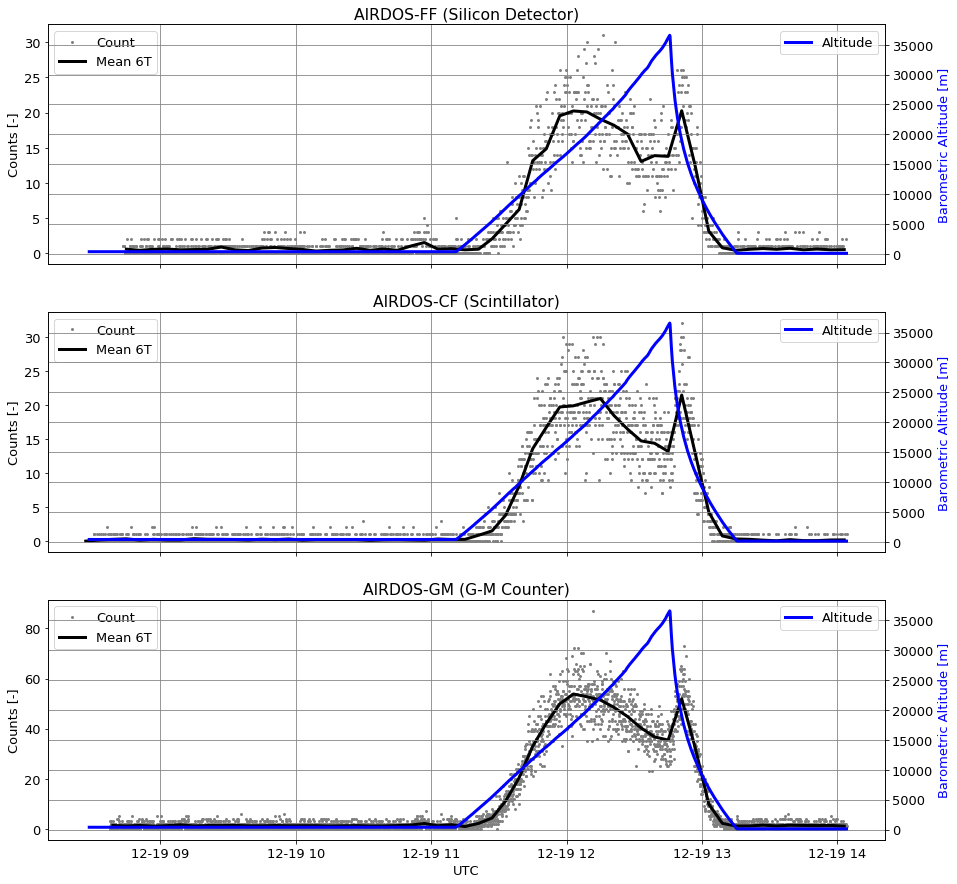

In [149]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ( ax5, ax4,ax2) \
    = plt.subplots(figsize=(15, 15), nrows=3, sharex=True)
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax4_twin = ax4.twinx()
ax5_twin = ax5.twinx()

MINUTES = 6
WINDOW = str(MINUTES) + 'T'
OFFSET = str(MINUTES/2) + 'T'

# GM
ax2.set_title("AIRDOS-GM (G-M Counter)")
ax2.set_ylabel('Counts [-]')
ax2.plot(gm.index, gm['GMCount'], linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax2.plot(gm['GMCount'].resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
#ax2.grid( b=False,which='major', color='grey', linestyle='-', axis='y')
#ax2.grid( False)
ax2.legend(loc=2)

ax1.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax1.set_title("AIRDOS-GM")
ax1.plot(gm.index, gm['Temp'], color='red', label='Temperature')
ax1.grid(b=True, which='major', color='grey', linestyle='-')
ax1.legend(loc=3)
ax1_twin.set_ylabel('Humidity [%]', color='green')
ax1_twin.plot(gm.index, gm['Humid'], label='Humidity', color='green')
ax1_twin.legend(loc=4)

#ax2_twin.set_ylabel('Barometric Altitude [$m$]', color='blue')
#ax2_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
#              color='blue', lw=3)
#ax2.grid(b=True, which='major', color='grey', linestyle='-', axis='y')
#ax2_twin.legend(loc=1)

# CF
spec = np.array(list(map(list, cf_candy['Bins'])))
flux_series = pd.Series(np.sum(spec[:,50:200], axis=1), index=cf_candy.index)

ax4.set_title("AIRDOS-CF (Scintillator)")
ax4.set_ylabel('Counts [-]')
ax4.plot(flux_series.index, flux_series.values, linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax4.plot(flux_series.resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
ax4.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax4.legend(loc=2)
ax3.set_title("AIRDOS-CF")
ax3.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax3.plot(cf_candy.index, cf_candy['Temp'], label='Temperature', color='red')
#ax3.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax3.legend(loc=3)
#ax3_twin.set_ylim(0,2000)
ax3_twin.set_yscale('log')
ax3_twin.set_ylabel('Pressure [Pa]', color='blue')
ax3_twin.plot(cf_candy.index, cf_candy['Pressure'], label='Pressure', color='blue')
ax3_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax3_twin.legend(loc=4)

ax4_twin.set_ylabel('Barometric Altitude [m]', color='blue')
ax4_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
              color='blue', lw=3, label='Altitude')
ax4_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax4_twin.legend(loc=1)


ax5_twin.set_ylabel('Barometric Altitude [m]', color='blue')
ax5_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
              color='blue', lw=3, label='Altitude')
ax5_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax5_twin.legend(loc=1)

# FF
#ax5.set_ylim(0, 60)
ax5.set_title('AIRDOS-FF (Silicon Detector)')
ax5.set_ylabel('Counts [-]')
ax5.plot(ff_candy['Flux'], linestyle='', marker='.', label='Count', markeredgewidth=0, color='gray')
ax5.plot(ff_candy['Flux'].resample(WINDOW, loffset=OFFSET).mean(), lw=3, label='Mean '+WINDOW, color='black')
ax5.grid(axis='x',b=True, which='major', color='grey', linestyle='-')
ax5.legend(loc=2)

ax8.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
         color='blue', lw=2, label='Barometric')
ax8.plot(cf_nav.index, cf_nav['Alt'],
         color='orange', lw=2, label='GPS')
ax8.legend(loc=1)
ax8.set_ylabel('Altitude [m]')
ax8.grid(b=True, which='major', color='grey', linestyle='-')

ax9.plot(cf_nav.index, cf_nav['Speed'], color='brown')
ax9.set_ylabel('Ground Speed [km/h]')
ax9.grid(b=True, which='major', color='grey', linestyle='-')
#ax9.set_ylim(0,150)
ax2_twin.set_ylabel('Barometric Altitude [m]', color='blue')
ax2_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
              color='blue', lw=3, label='Altitude')
ax2_twin.grid(axis='y',b=True, which='major', color='grey', linestyle='-')
ax2_twin.legend(loc=1)
ax2.set_xlabel('UTC')
ax2.grid(axis='x',b=True, which='major', color='grey', linestyle='-')

None

## SPACEDOS flux and dose

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [20]:
fto = "/storage/experiments/2020/12_fik6/let/FF/DATALOG_corr.TXT" #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
l.extend(range(0,258))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )
#df = pd.read_table(fto, sep=',', header=None,comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$STROKE'].index, inplace=True)
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS'][3]
print (sn[0])
#df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2020/12_fik6/let/FF/DATALOG_corr.TXT


KeyError: 0

In [21]:
run = 0

runs = []
LatDD = np.nan
LatD = np.nan
LatM = np.nan
LonDD = np.nan
LonD = np.nan
LonM = np.nan

for i,r in df.iterrows():
    if (r[0] == '$AIRDOS'):
        run = run + 1
        date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
        time = 0
        timedelta = 0
        timeoffset = 0
        datedate = pd.NaT
        altitude = np.nan
        Lat = np.nan
        Lon = np.nan
        speed = np.nan
        flag = 0
        flagrun = 0
        print (run, end='')
        
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y.00%H%M%S.%f',errors='coerce')
        speed = r[7]
        LatHem = r.astype(str)[4]
        LonHem = r.astype(str)[6]
        if (LatHem=='S'):     # Conferr DDMM.MM to DD.DD
            LatS = -1
        else:
            LatS = 1
        if (LonHem=='W'):
            LonS = -1
        else:
            LonS = 1
        Lat = float(r[3])
        LatD = np.trunc(Lat/100)
        LatM = ((Lat/100) - LatD) * 100
        LatDD = LatD + LatM/60.0
        LatDD = LatDD * LatS  
        Lon = float(r[5])
        LonD = np.trunc(Lon/100)
        LonM = ((Lon/100) - LonD) * 100
        LonDD = LonD + LonM/60.0
        LonDD = LonDD * LonS         
        print('ble: ',date)
        print('ble: ',str(r[9])+str(r[1]))
    
    if (r[0] == '$GPGGA'):
        altitude = r[9]

    if (r[0] == '$TIME'):
        if (not pd.isnull(date)) :
            flag = 1
            timeoffset = pd.to_numeric(r[1])
            datedate = date

    df.at[i,'date'] = date
    df.at[i,'altitude'] = altitude
    df.at[i,'speed'] = speed
        
    if (r[0] == '$CANDY'):
        time = pd.to_numeric(r[2])  # read seconds from power on
        if (flag == 1):
            timedelta = datedate
            if (flagrun == 0):
                runs.append([run,date,timedelta])
                flagrun = 1
            #flag = 0
        date_line = datedate + pd.to_timedelta(time - timeoffset, unit='s')

        try:
            df.at[i,'date'] = date_line
            df.at[i,'run'] = run
            df.at[i,'lat'] = LatDD
            df.at[i,'lon'] = LonDD
            df.at[i,'latD'] = LatD
            df.at[i,'lonD'] = LonD
            df.at[i,'latM'] = LatM
            df.at[i,'lonM'] = LonM
            df.at[i,'latHem'] = LatHem
            df.at[i,'lonHem'] = LonHem
        except:
            pass
        
  
FROM = pd.to_datetime('2019-11-27 00:00:00')
TO = pd.to_datetime('2019-11-29 01:10:00')
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-29 01:00:00')
#PRG-AGP
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-28 20:55:00')
#AGP-PRG
#FROM = pd.to_datetime('2019-11-28 23:00:00')
#TO = pd.to_datetime('2019-11-29 00:30:00')


dfo = df.copy()
#dfo = dfo.loc[(dfo['date']>FROM)&(dfo['date']<TO)]

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)
dfdeg = df[['latD','latM','latHem','lonD','lonM','lonHem','altitude','run','date']].copy()
dfdeg['altitude'] *= 3.28084
dfdeg['minute'] = 0
dfo['minute'] = 0
dfdeg = dfdeg.loc[(dfdeg['date']>FROM)&(dfdeg['date']<TO)]
#dfdeg.reset_index(inplace=True)

dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)

'''
TODO !!!!!!!!!!!!!!!!!!!!
# calculate empty dates
for x in runs:
    print x
    dfo.loc[(dfo['date'].isnull())&(dfo['run'] == x[0]),'TBD'] = x[0]
    dfo.loc[dfo['TBD'] == x[0],'time'] = pd.to_datetime(x[1] + (pd.to_timedelta(pd.to_numeric(dfo.loc[dfo['TBD'] == x[0],2]), unit='s')) - pd.to_timedelta(x[2], unit='s'))
    dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'time'] = dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'date']

dfo.drop(['TBD','date'], axis = 1, inplace = True, errors = 'ignore')
'''
print ()

for f in glob.iglob("../output/*.csv"): # delete all output files 
    print ('Deleting', f)
    #os.remove(f)


dfo.set_index('date', inplace = True)

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)

for x in runs: 
    filename = '../output/' + str(timedelta) + '_' + str(sn[0])
    print(filename)
    # Disimetric values
    #dfo.loc[dfo['run'] == x[0],'minute'] = (pd.to_timedelta(dfo.loc[dfo['run'] == x[0]].index-(x[1] + pd.to_timedelta(-x[2], unit='s')))).astype('timedelta64[m]').fillna(0).astype(int)
    dfo.loc[dfo['run'] == x[0]].to_csv(filename + '.csv')


print('End')

NameError: name 'date' is not defined

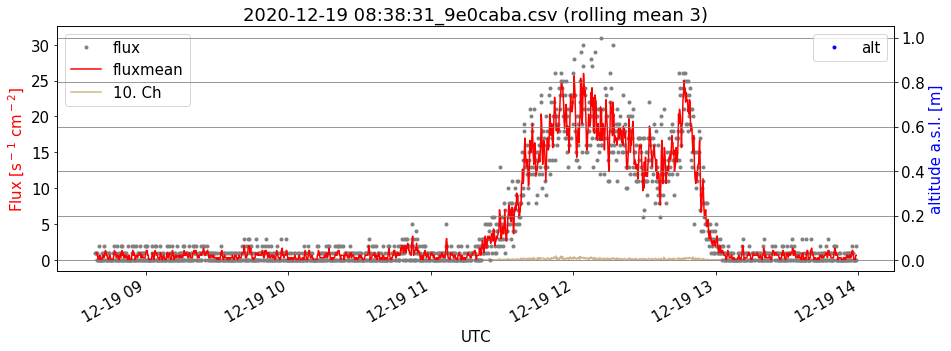

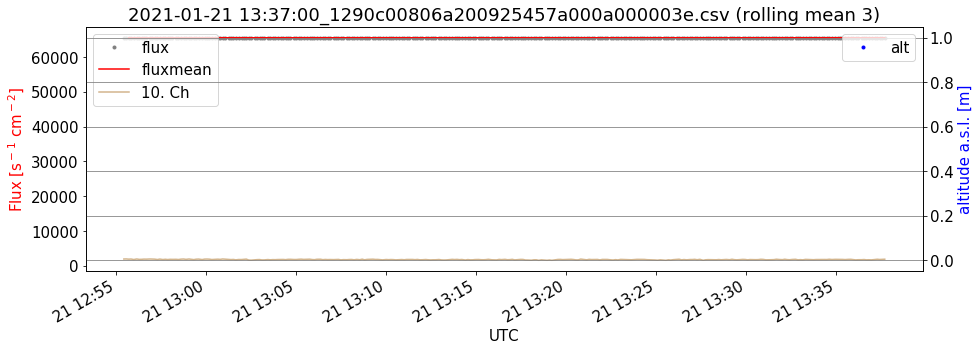

In [47]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 10
LAST_CHANNEL=254
WINDOW = 3

for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:
        plt.figure(figsize=(15,5))
        plt.tight_layout()
        xx = pd.read_csv(f)
        xx['date'] = pd.to_datetime(xx['date'])
        xx.set_index('date', inplace = True)
        xx.sort_index(inplace = True)
        #xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
        #xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']

        
        xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))#/2/10.4

        xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

        xx['flux'].plot(c='gray', linestyle='', marker='.')
        xx['fluxmean'].plot(c='red')
        (xx.iloc[:,NOISE_LEVEL]/2/10.4).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

        s = f.split('/')
        plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ')')
        #plt.ylim([0,1.5])
        plt.xlabel('UTC')
        plt.ylabel(r'Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
        plt.legend(loc=2)

        ax = plt.twinx()
                
        #plt.ylim([0,14000])
        xx['altitude'].plot(c='b', label='alt', marker='.', linewidth='2', linestyle='none', drawstyle='steps-mid')
        plt.ylabel('altitude a.s.l. [m]', color='blue')

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.legend()
    except:
        pass



ba.csv
2020-12-19 08:38:31_9e0caba.csv
          7      8    9   10   11  12
10  14326.0  796.0  1.0  0.0  0.0   0
11  14334.0  800.0  6.0  0.0  0.0   0
Window = 208.0 [s]
Mean Doserate from rolling mean values = 2.15 [μGy/h]
Mean Doserate = 2.16 [μGy/h]
Standard deviation from rolling mean values = 1.4



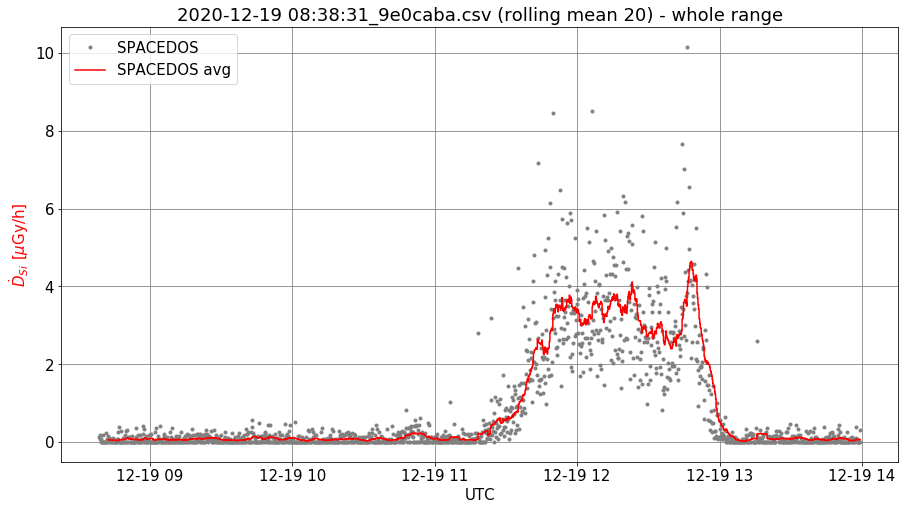

In [104]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 11     #  8 for DD, 9 for 98
BASE_ENERGY = 3
LAST_CHANNEL=245#64#245
WINDOW = 20

for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    plt.figure(figsize=(15,8))
    plt.tight_layout()
    xx = pd.read_csv(f)
    xx['date'] = pd.to_datetime(xx['date'])
    xx = xx.loc[xx['date'].isnull()==False]

    #xx.set_index('date', inplace = True)
    #xx = xx.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']

    s = f.split('/')
    plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ') - whole range')
    print(s[len(s)-1][-6:])
        
    # Deposited energy
    e = pd.DataFrame()
    e['Ch']=range(0,256)
    e['ener'] = e.index * 0.038 + 0.105
    xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+LAST_CHANNEL]) * np.asarray(e.loc[2:LAST_CHANNEL+1,'ener'])).sum(axis=1)    
    
    print(s[len(s)-1])
    print(xx.iloc[10:12,NOISE_LEVEL-3:NOISE_LEVEL+3])

    # size of the chip (20 mm · 10 mm), 
    # the thickness of the depletion layer (0.3 mm), 
    # and the density of silicon (2.33 g cm^3)
    # 0.1398e-3 kg
    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h

    xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()
    #xx.dropna(how='any', inplace=True)

    #plt.plot(xx['minute'], xx['flux'], c='gray', linestyle='', marker='.')
    plt.plot(xx['date'], xx['dsi'], c='gray', linestyle='', marker='.', label='SPACEDOS')
    plt.plot(xx['date'],xx['dsimean'],c='red', drawstyle='steps-mid', label='SPACEDOS avg')
    #plt.plot(xx.iloc[:,'minute'],xx['fluxmean']c='red')
    #plt.plot(xx.loc[:,'minute'],xx.iloc[:,NOISE_LEVEL],c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

    #plt.ylim([0,10])
    #plt.yscale('log')

    plt.xlabel('UTC')
    plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')
    plt.legend(loc=2)

    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')

    dose = xx.copy()
    dose.set_index('date', inplace=True)

    # Calculation of doserate for given time period
    dose = dose.loc['2020-12-19 11:00:00':'2020-12-19 13:0:00']

    print('Window =', WINDOW * 10.4, '[s]' )
    print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(), 2), '[\u03BCGy/h]' )
    print('Mean Doserate =', round(dose.dsi.mean(), 2), '[\u03BCGy/h]' )
    print('Standard deviation from rolling mean values =', round(dose.dsimean.std(), 2))
    print()
    
    break


0.03850279329608939 -0.040592178770949686


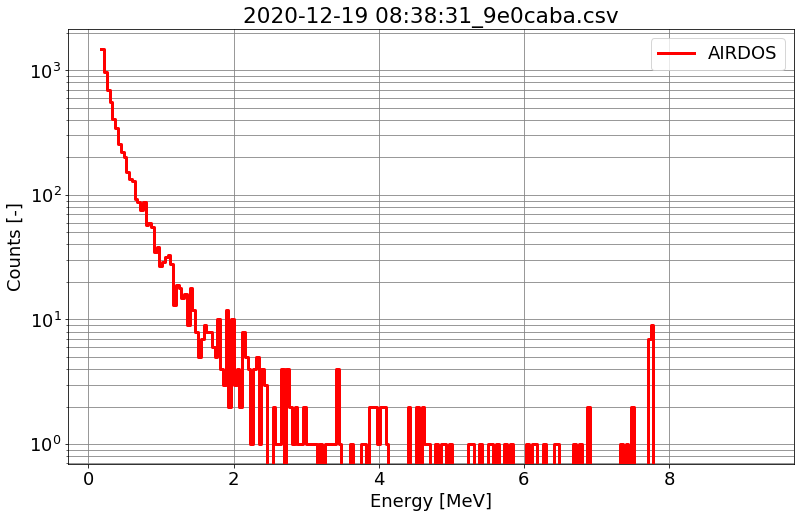

In [140]:
matplotlib.rcParams.update({'font.size': 18})

FROM_ENERGY = 0.18
TO_ENERGY = 9.0

l = np.array([[29+4, 1],[208+4,1]]) # Calibration
r = np.array([1.23, 8.122])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])

# force calibration coeficients
coef[0]=0.038
coef[1]=0.105
    
    
for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:        
        LOW_ENERGY = 10
        
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace = True)
        
        # Uncomment this if you are interested in a specific time interval
        #xx = df.loc['2019-01-24 05:00:00':'2019-01-24 13:00:00']
        #from 2019-11-28 18:55 to 2019-11-28 20:55 was used for the flight PRG-AGP
        #from 2019-11-28 23:00 to 2019-11-29 00:30 was used for the flight AGP-PRG
        xx = df.loc['2020-12-19 11:00:00':'2020-12-19 13:0:00']
        #xx = df
        ener1 = xx.iloc[:,LOW_ENERGY:250].sum()
        e = pd.DataFrame()
        e['1'] = ener1
        e['index'] = pd.to_numeric(ener1.index)
        e['x'] = (e['index']-8) * coef[0] + coef[1]
        e['deposit'] = e['1'] * e['x']
        depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

        dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) #* 1.1

        # size of the chip (20 mm · 10 mm), 
        # the thickness of the depletion layer (0.3 mm), 
        # and the density of silicon (2.33 g cm^3)
        # 0.1398e-3 kg
        #dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h
        
        
        if (depener > 0):
            plt.figure(figsize=(13,8))
            plt.tight_layout()
            s = f.split('/')
            plt.title(s[len(s)-1])
            plt.yscale('log')
            #plt.ylim([0.9,1e7])
            #plt.xlim([0.1,3])

            plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='AIRDOS')

            '''
            plt.text(4, 80, r'Counts = ' + str(int(ener1[1:].sum())), fontsize=18, color='r')
            plt.text(4, 50, r'Measurements = ' + str(xx.shape[0]), fontsize=18, color='r')
            plt.text(4, 30, r'$\epsilon$ = ' + str(round(depener,1)) + ' [MeV]', fontsize=18, color='r')
            plt.text(4, 20, r'D$_S$$_i$ = ' + str(round(dose,2)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
            '''
            plt.legend()
            plt.xlabel('Energy [MeV]')
            plt.ylabel('Counts [-]')
            plt.grid(b=True, which='major', color='grey', linestyle='-')
            plt.grid(b=True, which='minor', color='grey', linestyle='-')
        break
    except:
        pass


## AIRDOS NaI(Tl) 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [153]:
fto = "/storage/experiments/2020/12_fik6/let/CF/DATALOG.TXT" #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
l.extend(range(0,258))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')#,engine='python' )
#df = pd.read_table(fto, sep=',', header=None,comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$STROKE'].index, inplace=True)
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS'][3]
print (sn[0])
#df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2020/12_fik6/let/CF/DATALOG.TXT
1290c00806a200925457a000a000003e


In [157]:
run = 0

runs = []
LatDD = np.nan
LatD = np.nan
LatM = np.nan
LonDD = np.nan
LonD = np.nan
LonM = np.nan

for i,r in df.iterrows():
    if (r[0] == '$AIRDOS'):
        run = run + 1
        date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
        time = 0
        timedelta = 0
        timeoffset = 0
        datedate = pd.NaT
        altitude = np.nan
        Lat = np.nan
        Lon = np.nan
        speed = np.nan
        flag = 0
        flagrun = 0
        print (run, end='')
        
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
        speed = r[7]
        LatHem = r.astype(str)[4]
        LonHem = r.astype(str)[6]
        if (LatHem=='S'):     # Conferr DDMM.MM to DD.DD
            LatS = -1
        else:
            LatS = 1
        if (LonHem=='W'):
            LonS = -1
        else:
            LonS = 1
        Lat = float(r[3])
        LatD = np.trunc(Lat/100)
        LatM = ((Lat/100) - LatD) * 100
        LatDD = LatD + LatM/60.0
        LatDD = LatDD * LatS  
        Lon = float(r[5])
        LonD = np.trunc(Lon/100)
        LonM = ((Lon/100) - LonD) * 100
        LonDD = LonD + LonM/60.0
        LonDD = LonDD * LonS         
       
    if (r[0] == '$GPGGA'):
        altitude = r[9]

    if (r[0] == '$TIME'):
        if (not pd.isnull(date)) :
            flag = 1
            timeoffset = pd.to_numeric(r[1])
            datedate = date

    df.at[i,'date'] = date
    df.at[i,'altitude'] = altitude
    df.at[i,'speed'] = speed

    if (r[0] == '$CANDY'):
        time = pd.to_numeric(r[2])  # read seconds from power on
        if (flag == 1):
            timedelta = datedate
            if (flagrun == 0):
                runs.append([run,date,timedelta])
                flagrun = 1
            #flag = 0
        date_line = datedate + pd.to_timedelta(time - timeoffset, unit='s')
        
        try:
            df.at[i,'date'] = date_line
            df.at[i,'run'] = run
            df.at[i,'lat'] = LatDD
            df.at[i,'lon'] = LonDD
            df.at[i,'latD'] = LatD
            df.at[i,'lonD'] = LonD
            df.at[i,'latM'] = LatM
            df.at[i,'lonM'] = LonM
            df.at[i,'latHem'] = LatHem
            df.at[i,'lonHem'] = LonHem
        except:
            pass
        
  
FROM = pd.to_datetime('2019-11-27 00:00:00')
TO = pd.to_datetime('2019-11-29 01:10:00')
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-29 01:00:00')
#PRG-AGP
#FROM = pd.to_datetime('2019-11-28 18:55:00')
#TO = pd.to_datetime('2019-11-28 20:55:00')
#AGP-PRG
#FROM = pd.to_datetime('2019-11-28 23:00:00')
#TO = pd.to_datetime('2019-11-29 00:30:00')


dfo = df.copy()
#dfo = dfo.loc[(dfo['date']>FROM)&(dfo['date']<TO)]

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)
dfdeg = df[['latD','latM','latHem','lonD','lonM','lonHem','altitude','run','date']].copy()
dfdeg['altitude'] *= 3.28084
dfdeg['minute'] = 0
dfo['minute'] = 0
dfdeg = dfdeg.loc[(dfdeg['date']>FROM)&(dfdeg['date']<TO)]
#dfdeg.reset_index(inplace=True)

dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)
dfdeg.drop(dfo[dfo[0]=='$AIRDOS'].index, inplace=True)

'''
TODO !!!!!!!!!!!!!!!!!!!!
# calculate empty dates
for x in runs:
    print x
    dfo.loc[(dfo['date'].isnull())&(dfo['run'] == x[0]),'TBD'] = x[0]
    dfo.loc[dfo['TBD'] == x[0],'time'] = pd.to_datetime(x[1] + (pd.to_timedelta(pd.to_numeric(dfo.loc[dfo['TBD'] == x[0],2]), unit='s')) - pd.to_timedelta(x[2], unit='s'))
    dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'time'] = dfo.loc[(dfo['time'].isnull())&(dfo['run'] == x[0]),'date']

dfo.drop(['TBD','date'], axis = 1, inplace = True, errors = 'ignore')
'''
print ()

for f in glob.iglob("../output/*.csv"): # delete all output files 
    print ('Deleting', f)
    #os.remove(f)


dfo.set_index('date', inplace = True)

#01/2002, FL-27
#DEG MIN N/S DEG MIN E/W FEET TIME(MIN)

for x in runs: 
    filename = '../output/' + str(timedelta) + '_' + str(sn[0])

    # Disimetric values
    #dfo.loc[dfo['run'] == x[0],'minute'] = (pd.to_timedelta(dfo.loc[dfo['run'] == x[0]].index-(x[1] + pd.to_timedelta(-x[2], unit='s')))).astype('timedelta64[m]').fillna(0).astype(int)
    dfo.loc[dfo['run'] == x[0]].to_csv(filename + '.csv')


print('End')

1
Deleting ../output/2020-12-19 14:03:44_1290c00806a200925457a000a000003e.csv
Deleting ../output/2020-12-19 08:38:31_9e0caba.csv
Deleting ../output/2021-01-21 13:37:00_1290c00806a200925457a000a000003e.csv
End


/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/nix/store/k9gqj4g6bsmknij2n5492hnlcr34scv2-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                     12   13   14   15   16   17   18   19
date                                                      
2020-12-19 10:31:31   1  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2020-12-19 10:31:39   0  1.0  2.0  0.0  1.0  0.0  0.0  0.0
2020-12-19 10:31:47   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0


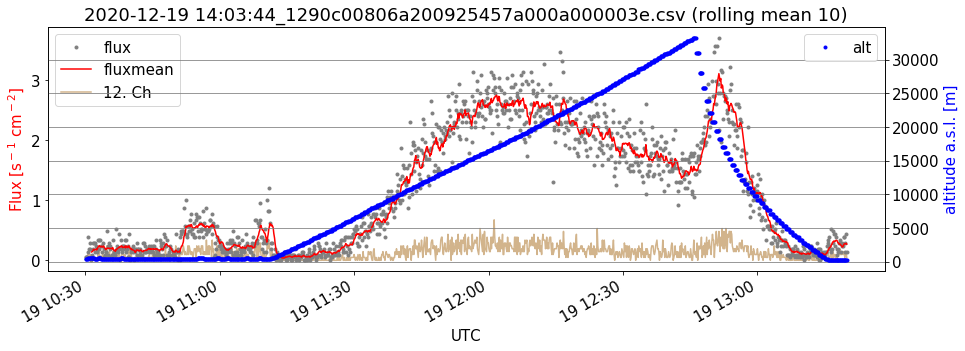

In [6]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 12
LAST_CHANNEL=254
WINDOW = 10

for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:
        plt.figure(figsize=(15,5))
        plt.tight_layout()
        xx = pd.read_csv(f)
        xx['date'] = pd.to_datetime(xx['date'])
        xx.set_index('date', inplace = True)
        #xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
        #xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
        xx = df.loc['2020-12-19 10:30:00':'2020-12-19 13:20:00']

        
        xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))/2/10.4

        xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

        xx['flux'].plot(c='gray', linestyle='', marker='.')
        xx['fluxmean'].plot(c='red')
        (xx.iloc[:,NOISE_LEVEL]/2/10.4).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

        s = f.split('/')
        plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ')')
        #plt.ylim([0,1.5])
        plt.xlabel('UTC')
        plt.ylabel(r'Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
        plt.legend(loc=2)

        ax = plt.twinx()
                
        #plt.ylim([0,14000])
        xx['altitude'].plot(c='b', label='alt', marker='.', linewidth='2', linestyle='none', drawstyle='steps-mid')
        plt.ylabel('altitude a.s.l. [m]', color='blue')

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.legend()
        print(xx.iloc[10:13,12:20])
        break
    except:
        pass



0.03850279329608939 -0.040592178770949686
                     12   13   14   15   16   17   18   19
date                                                      
2020-12-19 11:01:28   0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
2020-12-19 11:01:37   2  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2020-12-19 11:01:45   0  0.0  0.0  0.0  0.0  1.0  0.0  1.0


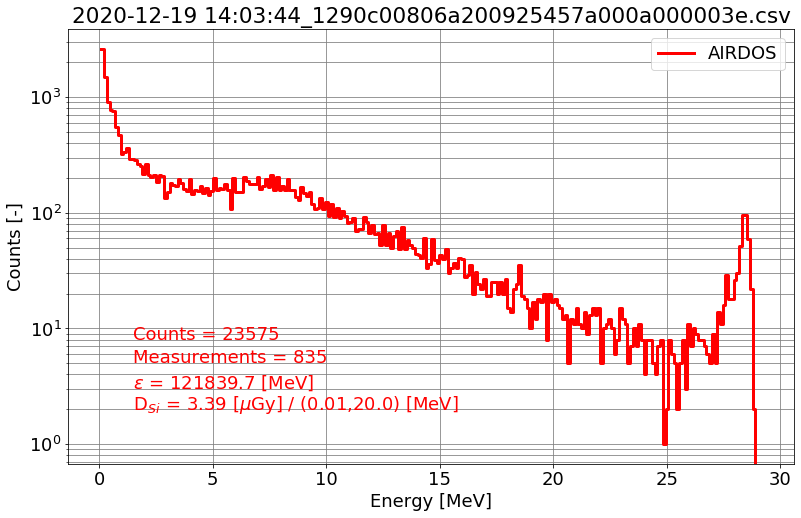

In [2]:
matplotlib.rcParams.update({'font.size': 18})

FROM_ENERGY = 0.01
TO_ENERGY = 20.0

l = np.array([[29+4, 1],[208+4,1]]) # Calibration
r = np.array([1.23, 8.122])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])

# force calibration coeficients
coef[0]=0.12
coef[1]=0.10
    
    
for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    try:        
        LOW_ENERGY = 12
        
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace = True)
        
        # Uncomment this if you are interested in a specific time interval
        #xx = df.loc['2019-01-24 05:00:00':'2019-01-24 13:00:00']
        #from 2019-11-28 18:55 to 2019-11-28 20:55 was used for the flight PRG-AGP
        #from 2019-11-28 23:00 to 2019-11-29 00:30 was used for the flight AGP-PRG
        #xx = df.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
        xx = df.loc['2020-12-19 11:00:00':'2020-12-19 13:0:00']
        #xx = df
        ener1 = xx.iloc[:,LOW_ENERGY:255].sum()
        e = pd.DataFrame()
        e['1'] = ener1
        e['index'] = pd.to_numeric(ener1.index)
        e['x'] = (e['index']-12) * coef[0] + coef[1]
        e['deposit'] = e['1'] * e['x']
        depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

        dose = (1e6*(1.602e-19 * depener*1e6)/(3.6e-3*1.6))
        # size of crystal (D 10 mm x 20 mm = 1.6 cm^3), 
        # and the density of NaI(Tl) (3.67 g cm^3)
        #dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h
        
        
        if (depener > 0):
            plt.figure(figsize=(13,8))
            plt.tight_layout()
            s = f.split('/')
            plt.title(s[len(s)-1])
            plt.yscale('log')
            #plt.ylim([0.9,1e7])
            #plt.xlim([0.1,3])

            plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='AIRDOS')

            #plt.text(1.5, 30, r'$\epsilon$ = ' + str(round(depener*1.1,1)) + ' [MeV]', fontsize=18, color='r')
            #plt.text(1.5, 20, r'D$_S$$_i$ = ' + str(round(dose*1.1*2.71,2)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

            plt.text(1.5, 8, r'Counts = ' + str(int(ener1[1:].sum())), fontsize=18, color='r')
            plt.text(1.5, 5, r'Measurements = ' + str(xx.shape[0]), fontsize=18, color='r')
            plt.text(1.5, 3, r'$\epsilon$ = ' + str(round(depener,1)) + ' [MeV]', fontsize=18, color='r')
            plt.text(1.5, 2, r'D$_S$$_i$ = ' + str(round(dose,2)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

            plt.legend()
            plt.xlabel('Energy [MeV]')
            plt.ylabel('Counts [-]')
            plt.grid(b=True, which='major', color='grey', linestyle='-')
            plt.grid(b=True, which='minor', color='grey', linestyle='-')
            
        print(xx.iloc[10:13,12:20])

        break
    except:
        pass


dd.csv
2021-03-24 15:37:26_1290c00806a200912857a000a00000dd.csv
Empty DataFrame
Columns: [9, 10, 11, 12, 13, 14]
Index: []
Window = 104.0 [s]
Mean Doserate from rolling mean values = nan [μGy/h]
Mean Doserate = nan [μGy/h]
Standard deviation from rolling mean values = nan



NameError: name 'BASE_ENERGY' is not defined

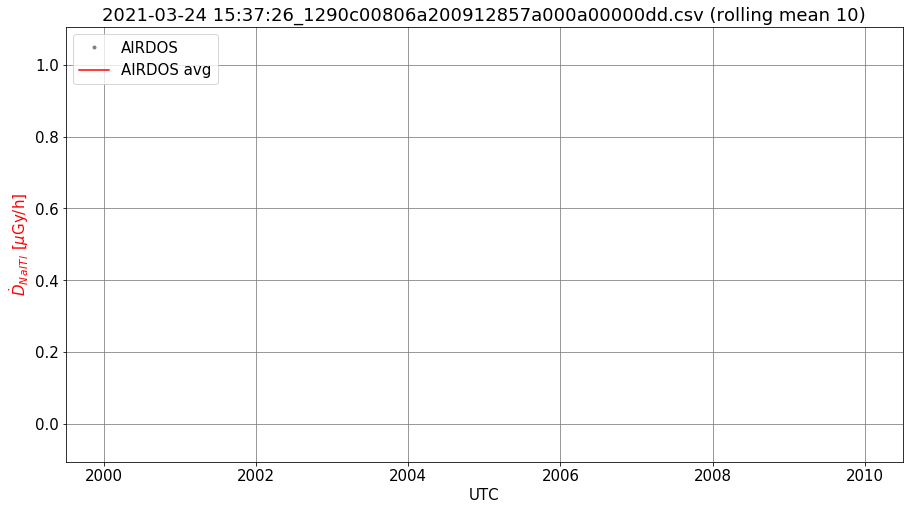

In [57]:
matplotlib.rcParams.update({'font.size': 15})

NOISE_LEVEL= 12     #  8 for DD, 9 for 98
#BASE_ENERGY = 12
LAST_CHANNEL=245
WINDOW = 10

for f in glob.iglob("../output/*.csv"): # generator, search immediate subdirectories 
    plt.figure(figsize=(15,8))
    plt.tight_layout()
    xx = pd.read_csv(f)
    xx['date'] = pd.to_datetime(xx['date'])
    xx.set_index('date', inplace = True)
    xx = xx.loc['2020-12-19 10:30:00':'2020-12-19 13:30:00']

    s = f.split('/')
    plt.title(s[len(s)-1] + ' (rolling mean ' + str(WINDOW) + ')')
    print(s[len(s)-1][-6:])
        
    # Deposited energy
    e = pd.DataFrame()
    e['Ch']=range(0,256)
    e['ener'] = e.index * 0.12 + 0.1
    xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+245]) * np.asarray(e.loc[0:244,'ener'])).sum(axis=1)    
    
    print(s[len(s)-1])
    print(xx.iloc[10:12,NOISE_LEVEL-3:NOISE_LEVEL+3])

    # size of crystal (D 10 mm x 20 mm = 1.6 cm^3), 
    # and the density of NaI(Tl) (3.67 g cm^3)
    #dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h
    
    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/(3.67e-3*1.6))/10.4) * 3600 # in uGy/h

    xx['dsimean'] = xx['dsi'].rolling(WINDOW).mean()
    #xx.dropna(how='any', inplace=True)

    #plt.plot(xx['minute'], xx['flux'], c='gray', linestyle='', marker='.')
    plt.plot(xx.index, xx['dsi'], c='gray', linestyle='', marker='.', label='AIRDOS')
    plt.plot(xx.index,xx['dsimean'],c='red', drawstyle='steps-mid', label='AIRDOS avg')
    #plt.plot(xx.iloc[:,'minute'],xx['fluxmean']c='red')
    #plt.plot(xx.loc[:,'minute'],xx.iloc[:,NOISE_LEVEL],c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

    #plt.ylim([0,10])
    #plt.yscale('log')

    plt.xlabel('UTC')
    plt.ylabel(r'$\.D$$_N$$_a$$_I$$_T$$_l$ [$\mu$Gy/h]', color='red')
    plt.legend(loc=2)

    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')

    dose = xx.copy()
    #dose.set_index('date', inplace=True)

    # Calculation of doserate for given time period
    #dose = dose.loc['2020-12-04 12:00:00':'2020-12-04 12:18:00']

    print('Window =', WINDOW * 10.4, '[s]' )
    print('Mean Doserate from rolling mean values =', round(dose.dsimean.mean(), 2), '[\u03BCGy/h]' )
    print('Mean Doserate =', round(dose.dsi.mean(), 2), '[\u03BCGy/h]' )
    print('Standard deviation from rolling mean values =', round(dose.dsimean.std(), 2))
    print()
    print(xx.iloc[20:23,BASE_ENERGY:22])
    break

In [28]:
xx.iloc[20:23,12:]
#e

,12,13,14,15,16,17,18,19,20,21,...,latD,lonD,latM,lonM,latHem,lonHem,minute,ener,dsi,dsimean
date,,,,,,,,,,,,,,,,,,,,,
2020-12-19 08:31:28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,14.0,42.93312,5.61004,N,E,0,1.06,0.010010,0.030182
2020-12-19 08:31:36,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,49.0,14.0,42.93312,5.61004,N,E,0,6.88,0.064973,0.033374
2020-12-19 08:31:45,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49.0,14.0,42.93312,5.61004,N,E,0,3.26,0.030787,0.034621


In [67]:
df1 = gm['GMCount'].resample('1T').sum()
df2 = cf_candy['Flux'].resample('1T').sum().rename('NaITlCount')
df3 = ff_candy['Flux'].resample('1T').sum().rename('SiCount')
df4 = cf_candy['Pressure'].apply(press2alt).resample('1T').mean().rename('Alt')

In [68]:
df = pd.concat([df1, df2, df3, df4], axis=1)
df.reset_index(inplace=True)
df.set_index('Alt',inplace=True)
df.drop('Time', axis=1, inplace=True)
df.sort_index(inplace=True)

,GMCount,NaITlCount,SiCount
Alt,,,
101.711949,14.0,8,2.0
101.942742,15.0,11,4.0
102.213318,1.0,1,NaN
102.220325,9.0,3,2.0
102.234334,14.0,11,1.0
...,...,...,...
34054.312670,432.0,169,62.0
34534.484775,382.0,138,65.0
35099.551996,337.0,154,46.0


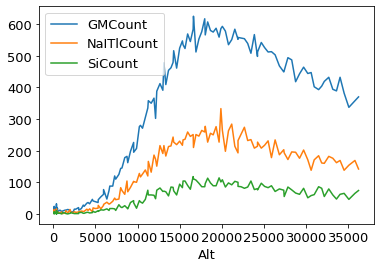

In [69]:
df.plot()
df

,count,CFCount,FFCount
Alt,,,
101.711949,14.0,8,2.0
101.942742,15.0,11,4.0
102.213318,1.0,1,NaN
102.220325,9.0,3,2.0
102.234334,14.0,11,1.0
...,...,...,...
34054.312670,432.0,169,62.0
34534.484775,382.0,138,65.0
35099.551996,337.0,154,46.0


[-5.76930559e-19  6.38653224e-14 -2.60287463e-09  4.60335621e-05
 -3.04752527e-01  7.15274869e+02]
[-2.32559167e-19  2.51143500e-14 -9.81995262e-10  1.59621922e-05
 -8.16321292e-02  8.34255588e+01]
[-1.33412126e-19  1.46625114e-14 -5.95555115e-10  1.06361646e-05
 -7.48193118e-02  1.85663599e+02]


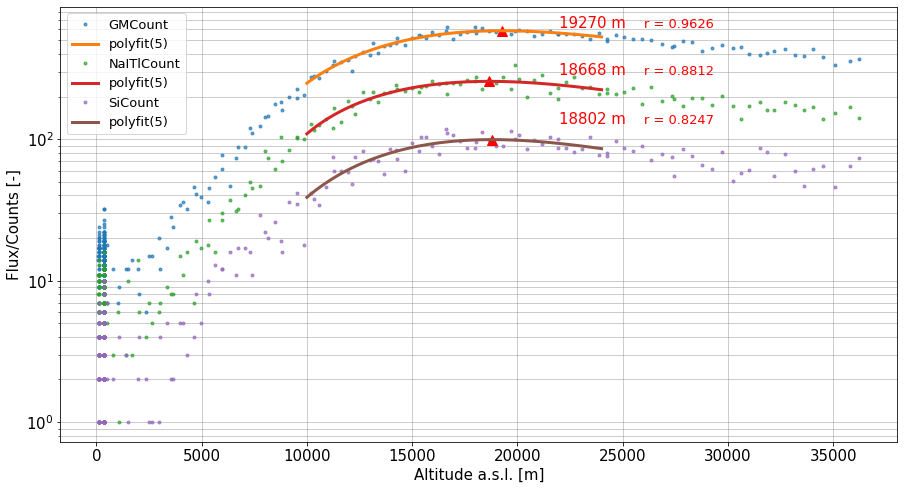

In [70]:
from scipy.stats.stats import pearsonr
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 15})

for count in ['GMCount','NaITlCount','SiCount']:
    zz = df.copy()
    zz.rename({count:'count'}, axis=1, inplace=True)
    zz.dropna(inplace=True)
    
    plt.yscale('log')
    plt.plot(zz['count'], linestyle='', marker='.', alpha=0.7, label=count)

    zz = zz.loc[(zz.index > 10000)&(zz.index<35000)]
    coef = np.polyfit(zz.index,zz['count'], 5)
    print(coef)
    p = np.poly1d(coef)
    
    crit = p.deriv().r
    r_crit = crit[crit.imag==0].real
    test = p.deriv(2)(r_crit) 
    
    x_max = r_crit[test<0]
    y_max = p(x_max)
    plt.plot( x_max, y_max, '^', ms=10, color = 'red' )

    t = np.linspace(10000, 24000, 100)
    plt.plot(t, p(t), '-', label='polyfit(5)', alpha=1, lw=3)

    r = pearsonr(p(zz.index),zz['count'])
    plt.text(26000,y_max+30,'r = ' + str(round(r[0],4)), fontsize=13, color='r')
    plt.text(22000,y_max+30, str(int(round(x_max[0]))) + ' m', fontsize=15, color='red')
    #plt.text(0,0.59, r'$(' + '{0:1.2E}'.format(coef[0]) +') x^4 + (' + '{0:1.2E}'.format(coef[1]) +') x^3 + ('  + '{0:1.2E}'.format(coef[2]) +') x^2 + ('  + '{0:1.2E}'.format(coef[3]) +') x + ' + str(round(coef[4], 4)) + '$', fontsize=12, color='r')
    #plt.text(23000,y_max+30, r'$(' + '{0:1.2E}'.format(coef[0]) +') x^3 + ('  + '{0:1.2E}'.format(coef[1]) +') x^2 + ('  + '{0:1.2E}'.format(coef[2]) +') x + (' + str(round(coef[3], 2)) + ')$', fontsize=10, color='r')

plt.xlabel('Altitude a.s.l. [m]')
plt.ylabel('Flux/Counts [-]')
plt.grid(b=True, which='major', color='grey', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='grey', linestyle='-',alpha=0.5)

matplotlib.rcParams.update({'font.size': 13})
plt.legend()


In [99]:
from scipy.stats.stats import pearsonr

zz['Alt'] = df[]

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

PERIOD = '300s'

xx['flux1'] = xx['flux']/40
xx['std'] = xx['flux1']
mmm = xx['flux1'].resample(PERIOD).mean()
sss = xx['std'].resample(PERIOD).std()
#aaa = df2['altitude'].resample(PERIOD).pad()
aaa = df2['altitude'].resample(PERIOD).mean()
zz = pd.concat([mmm, aaa, sss], axis=1)
#zz['roundalt'] = zz.altitude/1000.
#zz['roundalt'] = zz.roundalt.round(0)*1000

zz.dropna(inplace=True)
zz = zz.loc['1900-1-1 8:0:0':'1900-1-1 11:05:0']

zz.reset_index(drop=True, inplace=True)
#zz.set_index(['altitude'], inplace=True)

plt.errorbar(zz['altitude'],zz['flux1'], yerr=zz['std'], fmt='+', ms=8, ecolor='grey',ls='none', mec='blue', capsize=0)
#plt.plot(zz.altitude,zz.flux1, linestyle='None', marker='.')
plt.title('CANDY Fik3')
plt.xlabel('altitude a.s.l.  [m]')
plt.ylabel('count [cm^-2 s^-1]')

coef = np.polyfit(zz.altitude,zz.flux1, 4)
p = np.poly1d(coef)

t = np.linspace(7000, 35000, 100)
plt.plot(t, p(t), '-', label=p, color='r')

#plt.legend(loc=1)
r = pearsonr(p(zz['altitude']),zz['flux1'])
plt.text(0,0.57,'r = ' + str(round(r[0],5)), fontsize=12, color='r')
plt.text(0,0.59, r'$(' + '{0:1.2E}'.format(coef[0]) +') x^4 + (' + '{0:1.2E}'.format(coef[1]) +') x^3 + ('  + '{0:1.2E}'.format(coef[2]) +') x^2 + ('  + '{0:1.2E}'.format(coef[3]) +') x + ' + str(round(coef[4], 4)) + '$', fontsize=12, color='r')

In [48]:
df1

Time
2020-12-19 08:28:00+00:00                                                    1
2020-12-19 08:29:00+00:00                                             0.833333
2020-12-19 08:30:00+00:00                                             0.714286
2020-12-19 08:31:00+00:00                                             0.714286
2020-12-19 08:32:00+00:00                                             0.428571
                                                   ...                        
2020-12-19 14:01:00+00:00                                                1.375
2020-12-19 14:02:00+00:00                                              1.14286
2020-12-19 14:03:00+00:00                                             0.666667
2020-12-19 14:04:00+00:00                                                    1
flux                         Time
2020-12-19 08:28:00+00:00    1.000000
202...
Name: Flux, Length: 338, dtype: object

In [18]:
df

,Lat,Lon,Alt,Time,Speed,MeasNo,Sync,Pressure,Temp,Supress,Flux,Offset,Bins
Time,,,,,,,,,,,,,
2020-12-19 08:29:08+00:00,49.715597,14.093440,471.3,1854.0,2.896528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19 08:29:53+00:00,49.715593,14.093447,450.7,1899.0,0.261132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19 08:30:37+00:00,49.715567,14.093482,443.1,1943.0,1.383444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19 08:31:21+00:00,49.715552,14.093501,461.9,1987.0,2.281664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19 08:32:05+00:00,49.715595,14.093570,469.1,2031.0,0.998228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19 14:03:25+00:00,NaN,NaN,NaN,21911.0,NaN,2536.0,3.0,100103.25,2.00,0.0,0.0,257.0,"[1, 26446, 39079, 1, 2, 0, 3, 1, 0, 0, 0, 1, 0..."
2020-12-19 14:03:33+00:00,NaN,NaN,NaN,21919.0,NaN,2537.0,1.0,100101.00,2.00,0.0,0.0,256.0,"[0, 26368, 39162, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0..."
2020-12-19 14:03:42+00:00,NaN,NaN,NaN,21928.0,NaN,2538.0,0.0,100102.50,2.00,0.0,0.0,256.0,"[1, 27338, 38185, 2, 3, 0, 3, 0, 0, 0, 2, 0, 0..."


No handles with labels found to put in legend.


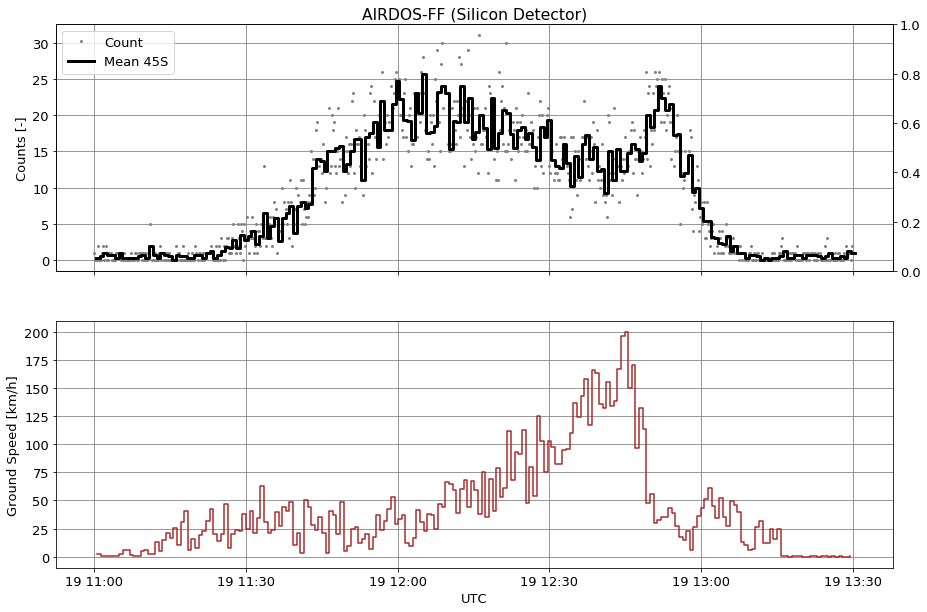

In [56]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, (ax5, ax9 ) \
    = plt.subplots(figsize=(15, 10), nrows=2, sharex=True)
ax1_twin = ax1.twinx()
#ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax4_twin = ax4.twinx()
ax10_twin = ax5.twinx()

MINUTES = 45
WINDOW = str(MINUTES) + 'S'
OFFSET = str(MINUTES/2) + 'S'

xx_ff_candy = ff_candy.loc['2020-12-19 11:00:00':'2020-12-19 13:30:00']
xx_cf_nav = cf_nav.loc['2020-12-19 11:00:00':'2020-12-19 13:30:00']


# GM
ax2.set_title("AIRDOS-GM (G-M Counter)")
ax2.set_ylabel('Counts [-]')
ax2.plot(gm.index, gm['GMCount'], linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax2.plot(gm['GMCount'].resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
ax2.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax2.legend(loc=2)

ax1.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax1.set_title("AIRDOS-GM")
ax1.plot(gm.index, gm['Temp'], color='red', label='Temperature')
ax1.grid(b=True, which='major', color='grey', linestyle='-')
ax1.legend(loc=3)
ax1_twin.set_ylabel('Humidity [%]', color='green')
ax1_twin.plot(gm.index, gm['Humid'], label='Humidity', color='green')
ax1_twin.legend(loc=4)

#ax2_twin.set_ylabel('Barometric Altitude [$m$]', color='blue')
#ax2_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
#              color='blue', lw=3)
ax2.grid(b=True, which='major', color='grey', linestyle='-', axis='y')
#ax2_twin.legend(loc=1)

# CF
spec = np.array(list(map(list, cf_candy['Bins'])))
flux_series = pd.Series(np.sum(spec[:,50:200], axis=1), index=cf_candy.index)

ax4.set_title("AIRDOS-CF (Scintillator)")
ax4.set_ylabel('Counts [-]')
ax4.plot(flux_series.index, flux_series.values, linestyle='', label='Count', marker='.', markeredgewidth=0, color='gray')
ax4.plot(flux_series.resample(WINDOW, loffset=OFFSET).mean(), label='Mean '+WINDOW, lw=3, color='black')
ax4.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax4.legend(loc=2)
ax3.set_title("AIRDOS-CF")
ax3.set_ylabel('Temperature [$^{\circ}C$]', color='red')
ax3.plot(cf_candy.index, cf_candy['Temp'], label='Temperature', color='red')
ax3.grid(b=True, which='major', color='grey', linestyle='-', axis='x')
ax3.legend(loc=3)
#ax3_twin.set_ylim(0,2000)
ax3_twin.set_yscale('log')
ax3_twin.set_ylabel('Pressure [Pa]', color='blue')
ax3_twin.plot(cf_candy.index, cf_candy['Pressure'], label='Pressure', color='blue')
ax3_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax3_twin.legend(loc=4)

ax4_twin.set_ylabel('Barometric Altitude [m]', color='blue')
ax4_twin.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
              color='blue', lw=3)
ax4_twin.grid(b=True, which='major', color='grey', linestyle='-')
ax4_twin.legend(loc=1)

# FF
#ax5.set_ylim(0, 60)
ax5.set_title('AIRDOS-FF (Silicon Detector)')
ax5.set_ylabel('Counts [-]')
ax5.plot(xx_ff_candy['Flux'], linestyle='', marker='.', label='Count', markeredgewidth=0, color='gray')
ax5.plot(xx_ff_candy['Flux'].resample(WINDOW, loffset=OFFSET).mean(), lw=3, label='Mean '+WINDOW, color='black',drawstyle='steps-post')
ax5.grid(b=True, which='major', color='grey', linestyle='-')
ax5.legend(loc=2)

ax8.plot(cf_candy.index, cf_candy['Pressure'].apply(press2alt),
         color='blue', lw=2, label='Barometric')
ax8.plot(cf_nav.index, cf_nav['Alt'],
         color='orange', lw=2, label='GPS')
ax8.legend(loc=1)
ax8.set_ylabel('Altitude [m]')
ax8.grid(b=True, which='major', color='grey', linestyle='-')

ax9.plot(xx_cf_nav.index, xx_cf_nav['Speed'], color='brown',drawstyle='steps-post')
ax9.set_ylabel('Ground Speed [km/h]')
ax9.grid(b=True, which='major', color='grey', linestyle='-')
#ax9.set_ylim(0,150)
ax9.set_xlabel('UTC')

#ax10_twin.plot(xx_cf_nav.index, xx_cf_nav['Speed'], color='brown',drawstyle='steps-post')
#ax10_twin.set_ylabel('Ground Speed [km/h]')
#ax10_twin.grid(b=True, which='major', color='grey', linestyle='-')
#ax10_twin.set_xlabel('UTC')


None